#To what extent does an ageing population affect house prices in Leeds?

##Introduction

An increasing ageing population is a new phenomenon that the world is facing in the 21st century characterised by low fertility rates, decreasing late-life mortality, and increasing migration (Harper and Leeson, 2008). it is estimated that by 2050, people aged 60 and over will double to over 2 billion (WHO, 2022, Harper and Leeson, 2008). This brings with it many implications, some positive such as increasing productivity in some countries (Healy, 2024) and some negative, such as an increase in informal caregiving (Ratcliffe et al., 2012). In this study, the focus is on the relationship that an ageing population has on house prices, more specifically in the Leeds area of the UK.

The effect that ageing has on real estate and land prices can be seen more obviously in Japan because Japan has the fastest-growing rate of ageing population out of any developed country in the world (Saita et al., 2016). The findings by Saita et al. (2016) were that an ageing population has a negative effect on house prices in Japan. Takáts (2012) also found in their study of 22 advanced economies that ageing will decrease house prices by around 80 basis points per year. A third study in Australia concurs with these results, whereby ageing could affect property prices negatively by up to 27% over 2008-2050 (Guest and Swift, 2010).

The aims of this study are to establish first the average percentage per year differences between house prices and ageing separately. This derives the general trend of both datasets and creates averages for each LSOA in Leeds. These two results are then correlated to show their relationship to one another, with a respective r value which derives the strength of correlation. The final aim is to map where in Leeds there is a large increasing ageing population and where there is a low or even negative ageing population.

The intended audience is the general public and business owners in Leeds who are looking to purchase property. This would help them make an informed decision as to where in Leeds would be sensible to purchase property assets given the relationship between ageing and property prices.

##Methodology

Data was downloaded from the Office of National Statistics (ONS) for ageing data from 2013 to 2022 (ONS, 2024). This was the most recent data on population estimates so a 10-year period was taken to analyse. Data for house prices was also taken from the ONS website (ONS, 2024). For the final map the lower layer super output areas (LSOA) for the UK were downloaded (UK Data Service, 2022).

Data is imported to the jupyter notebook (the 10 population CSVs’, the mean house price CSV and the LSOA shapefile with respective files). Data is then cleaned using a multitude of techniques. The age to define an elderly population was taken above age 65, this is to echo research (Saita et al., 2016) even though the age of retirement in England is 66.

Percent differences between consecutive years are calculated for age and house prices. A final average of all of these percent differences between years is used for the final correlation and scatter graph outputs using the columns “average percent differences in age” and “average percent differences for house prices”.

The spatial component takes the LSOA shapefile and removes all LSOA’s not related to Leeds. The final age average percent difference column is added to this shapefile using a join and the final map is coloured accordingly from positive to negative values per each LSOA in Leeds.


# Data Cleaning

In [1]:
# import required packages
# for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# for data manipulation
import pandas as pd
import numpy as np

In [2]:
# upload mean_house_price_csv, skipping first 4 rows as they are blank.
hp = pd.read_csv('Mean_price_house.csv', skiprows=4)
hp.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112
0,Local authority code,Local authority name,LSOA code,LSOA name,Year ending Dec 1995,Year ending Mar 1996,Year ending Jun 1996,Year ending Sep 1996,Year ending Dec 1996,Year ending Mar 1997,...,Year ending Sep 2020,Year ending Dec 2020,Year ending Mar 2021,Year ending Jun 2021,Year ending Sep 2021,Year ending Dec 2021,Year ending Mar 2022,Year ending Jun 2022,Year ending Sep 2022,Year ending Dec 2022
1,E08000035,Leeds,E01011264,Leeds 011A,"56,741","53,341","51,219","49,475","49,162","51,268",...,"266,132","257,708","250,019","229,473","221,693","216,760","241,206","252,591","262,909","275,942"
2,E08000035,Leeds,E01011265,Leeds 009A,"52,876","53,832","52,765","52,731","55,455","54,169",...,"262,062","258,423","284,736","289,792","284,139","293,823","287,601","271,886","269,835","271,681"
3,E08000035,Leeds,E01011266,Leeds 008A,"100,259","93,126","90,494","90,241","93,668","97,842",...,"340,368","363,473","367,697","380,764","383,216","371,302","364,514","331,291","305,056","305,089"
4,E08000035,Leeds,E01011267,Leeds 009B,"58,229","62,361","58,870","64,144","63,235","61,765",...,"258,578","276,030","276,568","267,059","258,076","260,261","266,280","282,865","269,763","253,091"


In [3]:
# Get the values from the 1st row and set new headers
new_headers = hp.iloc[0]
hp.columns = new_headers

# Start dataframe from first row
hp_clean = hp.iloc[1:]

# Reseting the index to start from 0 using drop = true to keep changes
hp_clean = hp_clean.reset_index(drop=True)

hp_clean.head()

,Local authority code,Local authority name,LSOA code,LSOA name,Year ending Dec 1995,Year ending Mar 1996,Year ending Jun 1996,Year ending Sep 1996,Year ending Dec 1996,Year ending Mar 1997,...,Year ending Sep 2020,Year ending Dec 2020,Year ending Mar 2021,Year ending Jun 2021,Year ending Sep 2021,Year ending Dec 2021,Year ending Mar 2022,Year ending Jun 2022,Year ending Sep 2022,Year ending Dec 2022
0,E08000035,Leeds,E01011264,Leeds 011A,"56,741","53,341","51,219","49,475","49,162","51,268",...,"266,132","257,708","250,019","229,473","221,693","216,760","241,206","252,591","262,909","275,942"
1,E08000035,Leeds,E01011265,Leeds 009A,"52,876","53,832","52,765","52,731","55,455","54,169",...,"262,062","258,423","284,736","289,792","284,139","293,823","287,601","271,886","269,835","271,681"
2,E08000035,Leeds,E01011266,Leeds 008A,"100,259","93,126","90,494","90,241","93,668","97,842",...,"340,368","363,473","367,697","380,764","383,216","371,302","364,514","331,291","305,056","305,089"
3,E08000035,Leeds,E01011267,Leeds 009B,"58,229","62,361","58,870","64,144","63,235","61,765",...,"258,578","276,030","276,568","267,059","258,076","260,261","266,280","282,865","269,763","253,091"
4,E08000035,Leeds,E01011268,Leeds 010A,"43,842","43,876","45,948","45,789","44,494","43,625",...,"168,539","174,148","180,605","171,226","170,137","166,486","163,285","170,943","184,576","176,418"


In [4]:
# removing all data not related to Leeds
# Chat GPT 3.5 helped in the creation of this code with prompt " how can I remove all data without the word Leeds in column local authority name"

# This defines the code to look in specified column where string contains Leeds, case = false employed incase Leeds is not capitalised
hp_clean = hp_clean[hp_clean['Local authority name'].str.contains('Leeds', case=False)]

# Reseting the index using drop = true to keep changes
hp_clean = hp_clean.reset_index(drop=True)

hp_clean.head()

,Local authority code,Local authority name,LSOA code,LSOA name,Year ending Dec 1995,Year ending Mar 1996,Year ending Jun 1996,Year ending Sep 1996,Year ending Dec 1996,Year ending Mar 1997,...,Year ending Sep 2020,Year ending Dec 2020,Year ending Mar 2021,Year ending Jun 2021,Year ending Sep 2021,Year ending Dec 2021,Year ending Mar 2022,Year ending Jun 2022,Year ending Sep 2022,Year ending Dec 2022
0,E08000035,Leeds,E01011264,Leeds 011A,"56,741","53,341","51,219","49,475","49,162","51,268",...,"266,132","257,708","250,019","229,473","221,693","216,760","241,206","252,591","262,909","275,942"
1,E08000035,Leeds,E01011265,Leeds 009A,"52,876","53,832","52,765","52,731","55,455","54,169",...,"262,062","258,423","284,736","289,792","284,139","293,823","287,601","271,886","269,835","271,681"
2,E08000035,Leeds,E01011266,Leeds 008A,"100,259","93,126","90,494","90,241","93,668","97,842",...,"340,368","363,473","367,697","380,764","383,216","371,302","364,514","331,291","305,056","305,089"
3,E08000035,Leeds,E01011267,Leeds 009B,"58,229","62,361","58,870","64,144","63,235","61,765",...,"258,578","276,030","276,568","267,059","258,076","260,261","266,280","282,865","269,763","253,091"
4,E08000035,Leeds,E01011268,Leeds 010A,"43,842","43,876","45,948","45,789","44,494","43,625",...,"168,539","174,148","180,605","171,226","170,137","166,486","163,285","170,943","184,576","176,418"


In [5]:
# Dropping all columns before year 2013 because age data starts from 2013
hp_clean = hp_clean.drop(hp_clean.columns[4:73], axis=1)


In [6]:
hp_clean.head()

,Local authority code,Local authority name,LSOA code,LSOA name,Year ending Mar 2013,Year ending Jun 2013,Year ending Sep 2013,Year ending Dec 2013,Year ending Mar 2014,Year ending Jun 2014,...,Year ending Sep 2020,Year ending Dec 2020,Year ending Mar 2021,Year ending Jun 2021,Year ending Sep 2021,Year ending Dec 2021,Year ending Mar 2022,Year ending Jun 2022,Year ending Sep 2022,Year ending Dec 2022
0,E08000035,Leeds,E01011264,Leeds 011A,"153,591","148,885","145,312","144,750","151,827","156,942",...,"266,132","257,708","250,019","229,473","221,693","216,760","241,206","252,591","262,909","275,942"
1,E08000035,Leeds,E01011265,Leeds 009A,"198,273","206,731","212,487","212,419","208,058","207,066",...,"262,062","258,423","284,736","289,792","284,139","293,823","287,601","271,886","269,835","271,681"
2,E08000035,Leeds,E01011266,Leeds 008A,"312,496","347,682","342,488","315,907","321,701","286,119",...,"340,368","363,473","367,697","380,764","383,216","371,302","364,514","331,291","305,056","305,089"
3,E08000035,Leeds,E01011267,Leeds 009B,"238,994","230,848","173,015","160,337","173,274","191,148",...,"258,578","276,030","276,568","267,059","258,076","260,261","266,280","282,865","269,763","253,091"
4,E08000035,Leeds,E01011268,Leeds 010A,"116,357","118,000","114,714","129,600","136,700","139,269",...,"168,539","174,148","180,605","171,226","170,137","166,486","163,285","170,943","184,576","176,418"


In [7]:
# removing commas  so that mathematical functions can be ran on data
# This code was created because errors were being output when mathematical functions were ran on the data
# code was generated from chat gpt 3.5 prompt "how can i remove comma's in all columns of a dataframe"

# The first line defines 'remove_commas'. Second line defines the parameter type as string and the third lone replaces the comma with nothing
def remove_commas(value):
    if isinstance(value, str):
        return value.replace(',', '')
    return value

#applymap function is used to run the remove commas function on the dataset
hp_clean = hp_clean.applymap(remove_commas)
hp_clean.head()

,Local authority code,Local authority name,LSOA code,LSOA name,Year ending Mar 2013,Year ending Jun 2013,Year ending Sep 2013,Year ending Dec 2013,Year ending Mar 2014,Year ending Jun 2014,...,Year ending Sep 2020,Year ending Dec 2020,Year ending Mar 2021,Year ending Jun 2021,Year ending Sep 2021,Year ending Dec 2021,Year ending Mar 2022,Year ending Jun 2022,Year ending Sep 2022,Year ending Dec 2022
0,E08000035,Leeds,E01011264,Leeds 011A,153591,148885,145312,144750,151827,156942,...,266132,257708,250019,229473,221693,216760,241206,252591,262909,275942
1,E08000035,Leeds,E01011265,Leeds 009A,198273,206731,212487,212419,208058,207066,...,262062,258423,284736,289792,284139,293823,287601,271886,269835,271681
2,E08000035,Leeds,E01011266,Leeds 008A,312496,347682,342488,315907,321701,286119,...,340368,363473,367697,380764,383216,371302,364514,331291,305056,305089
3,E08000035,Leeds,E01011267,Leeds 009B,238994,230848,173015,160337,173274,191148,...,258578,276030,276568,267059,258076,260261,266280,282865,269763,253091
4,E08000035,Leeds,E01011268,Leeds 010A,116357,118000,114714,129600,136700,139269,...,168539,174148,180605,171226,170137,166486,163285,170943,184576,176418


In [8]:
hp_clean.dtypes

0
Local authority code    object
Local authority name    object
LSOA code               object
LSOA name               object
Year ending Mar 2013    object
Year ending Jun 2013    object
Year ending Sep 2013    object
Year ending Dec 2013    object
Year ending Mar 2014    object
Year ending Jun 2014    object
Year ending Sep 2014    object
Year ending Dec 2014    object
Year ending Mar 2015    object
Year ending Jun 2015    object
Year ending Sep 2015    object
Year ending Dec 2015    object
Year ending Mar 2016    object
Year ending Jun 2016    object
Year ending Sep 2016    object
Year ending Dec 2016    object
Year ending Mar 2017    object
Year ending Jun 2017    object
Year ending Sep 2017    object
Year ending Dec 2017    object
Year ending Mar 2018    object
Year ending Jun 2018    object
Year ending Sep 2018    object
Year ending Dec 2018    object
Year ending Mar 2019    object
Year ending Jun 2019    object
Year ending Sep 2019    object
Year ending Dec 2019    object
Year e

In [9]:
# errors were still being output from the data when a mathematical function was ran, because columns had the data type "object" rather than numeric
# code was generated from chat gpt 3.5 prompt "how can i convert all columns containing the words "Year ending" to numeric?"

# creates an if argument for columns containing 'year ending' to assign to the function 'columns_year_ending'
columns_year_ending = [col for col in hp_clean.columns if 'Year ending' in col]

# 'to_numeric' pandas function is called for the columns year ending and changes the datatype to numeric
for col in columns_year_ending:
    hp_clean[col] = pd.to_numeric(hp_clean[col], errors='coerce') # coerce needed to be called as some entries contain non numeric data

hp_clean.dtypes


0
Local authority code     object
Local authority name     object
LSOA code                object
LSOA name                object
Year ending Mar 2013    float64
Year ending Jun 2013    float64
Year ending Sep 2013    float64
Year ending Dec 2013    float64
Year ending Mar 2014    float64
Year ending Jun 2014    float64
Year ending Sep 2014    float64
Year ending Dec 2014    float64
Year ending Mar 2015    float64
Year ending Jun 2015    float64
Year ending Sep 2015    float64
Year ending Dec 2015    float64
Year ending Mar 2016    float64
Year ending Jun 2016    float64
Year ending Sep 2016    float64
Year ending Dec 2016    float64
Year ending Mar 2017    float64
Year ending Jun 2017    float64
Year ending Sep 2017    float64
Year ending Dec 2017    float64
Year ending Mar 2018    float64
Year ending Jun 2018    float64
Year ending Sep 2018    float64
Year ending Dec 2018    float64
Year ending Mar 2019    float64
Year ending Jun 2019    float64
Year ending Sep 2019    float64
Year e

In [10]:
# taking the mean house price over each quater in each year to take an average price over the year
# Chat GPT version 3.5 was used in the creation for the "2013" line of this code - prompt "how can i take the mean of all the columns containing "2013" and create a new column with these values"

# create "house prices average" data frame or "hp_av"
hp_av = hp_clean.copy(deep=True)

#creating 1 column for each year if the columns contain the specified year
columns_2013 = [col for col in hp_av.columns if '2013' in col]
columns_2014 = [col for col in hp_av.columns if '2014' in col]
columns_2015 = [col for col in hp_av.columns if '2015' in col]
columns_2016 = [col for col in hp_av.columns if '2016' in col]
columns_2017 = [col for col in hp_av.columns if '2017' in col]
columns_2018 = [col for col in hp_av.columns if '2018' in col]
columns_2019 = [col for col in hp_av.columns if '2019' in col]
columns_2020 = [col for col in hp_av.columns if '2020' in col]
columns_2021 = [col for col in hp_av.columns if '2021' in col]
columns_2022 = [col for col in hp_av.columns if '2022' in col]

#adding "mean" columns
hp_av['2013_mean'] = hp_av[columns_2013].mean(axis=1)
hp_av['2014_mean'] = hp_av[columns_2014].mean(axis=1)
hp_av['2015_mean'] = hp_av[columns_2015].mean(axis=1)
hp_av['2016_mean'] = hp_av[columns_2016].mean(axis=1)
hp_av['2017_mean'] = hp_av[columns_2017].mean(axis=1)
hp_av['2018_mean'] = hp_av[columns_2018].mean(axis=1)
hp_av['2019_mean'] = hp_av[columns_2019].mean(axis=1)
hp_av['2020_mean'] = hp_av[columns_2020].mean(axis=1)
hp_av['2021_mean'] = hp_av[columns_2021].mean(axis=1)
hp_av['2022_mean'] = hp_av[columns_2022].mean(axis=1)

print(hp_av)

0   Local authority code Local authority name  LSOA code   LSOA name  \
0              E08000035                Leeds  E01011264  Leeds 011A   
1              E08000035                Leeds  E01011265  Leeds 009A   
2              E08000035                Leeds  E01011266  Leeds 008A   
3              E08000035                Leeds  E01011267  Leeds 009B   
4              E08000035                Leeds  E01011268  Leeds 010A   
..                   ...                  ...        ...         ...   
477            E08000035                Leeds  E01033031  Leeds 064E   
478            E08000035                Leeds  E01033032  Leeds 082F   
479            E08000035                Leeds  E01033033  Leeds 075F   
480            E08000035                Leeds  E01033034  Leeds 075G   
481            E08000035                Leeds  E01033035  Leeds 064F   

0    Year ending Mar 2013  Year ending Jun 2013  Year ending Sep 2013  \
0                153591.0              148885.0              1

In [11]:
# The dataset is large and only the means for each year are needed, to achieve this the first 4 columns are merged with only the columns containing the word "mean"
# Chat GPT version 3.5 was used in the creation for some of this code - prompt "I want to keep only the columns containing the word 'mean' and the first 4 columns of my dataframe"

# Get columns after the fourth column
columns_after_4 = hp_av.columns[4:]

# Filter columns containing the word "mean"
columns_mean = [col for col in columns_after_4 if 'mean' in col]

# Select columns before the fourth column
columns_before_4 = list(hp_av.columns[:4])  # Convert to list

# Concatenate the selected columns
keep_columns = columns_before_4 + columns_mean

# Select only the desired columns from the original dataframe
hp_av = hp_av[keep_columns]

hp_av.head()

,Local authority code,Local authority name,LSOA code,LSOA name,2013_mean,2014_mean,2015_mean,2016_mean,2017_mean,2018_mean,2019_mean,2020_mean,2021_mean,2022_mean
0,E08000035,Leeds,E01011264,Leeds 011A,148134.50,156496.75,167223.00,183401.75,196525.50,209193.25,204521.25,250446.75,229486.25,258162.00
1,E08000035,Leeds,E01011265,Leeds 009A,207477.50,204406.00,229782.00,242706.25,214964.75,224109.25,220591.75,245808.75,288122.50,275250.75
2,E08000035,Leeds,E01011266,Leeds 008A,329643.25,274157.25,258811.00,288781.25,274631.75,293276.50,357415.00,349502.25,375744.75,326487.50
3,E08000035,Leeds,E01011267,Leeds 009B,200798.50,206030.75,256806.75,238949.25,218654.25,218862.50,236072.50,249559.50,265491.00,267999.75
4,E08000035,Leeds,E01011268,Leeds 010A,119667.75,141450.25,133781.00,130320.50,145121.50,154540.50,161850.00,170135.75,172113.50,173805.50


In [12]:
# read out of columns
hp_av.columns

Index(['Local authority code', 'Local authority name', 'LSOA code',
       'LSOA name', '2013_mean', '2014_mean', '2015_mean', '2016_mean',
       '2017_mean', '2018_mean', '2019_mean', '2020_mean', '2021_mean',
       '2022_mean'],
      dtype='object', name=0)

In [13]:
# testing the creation of a percentage difference column from year to year (2013 to 2014)

hp_av['2013-2014_perc_diff'] = ((hp_av['2014_mean'] - hp_av['2013_mean'])/hp_av['2013_mean']) * 100

hp_av.head()

<ipython-input-13-091121e24336>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hp_av['2013-2014_perc_diff'] = ((hp_av['2014_mean'] - hp_av['2013_mean'])/hp_av['2013_mean']) * 100


,Local authority code,Local authority name,LSOA code,LSOA name,2013_mean,2014_mean,2015_mean,2016_mean,2017_mean,2018_mean,2019_mean,2020_mean,2021_mean,2022_mean,2013-2014_perc_diff
0,E08000035,Leeds,E01011264,Leeds 011A,148134.50,156496.75,167223.00,183401.75,196525.50,209193.25,204521.25,250446.75,229486.25,258162.00,5.645039
1,E08000035,Leeds,E01011265,Leeds 009A,207477.50,204406.00,229782.00,242706.25,214964.75,224109.25,220591.75,245808.75,288122.50,275250.75,-1.480401
2,E08000035,Leeds,E01011266,Leeds 008A,329643.25,274157.25,258811.00,288781.25,274631.75,293276.50,357415.00,349502.25,375744.75,326487.50,-16.832136
3,E08000035,Leeds,E01011267,Leeds 009B,200798.50,206030.75,256806.75,238949.25,218654.25,218862.50,236072.50,249559.50,265491.00,267999.75,2.605722
4,E08000035,Leeds,E01011268,Leeds 010A,119667.75,141450.25,133781.00,130320.50,145121.50,154540.50,161850.00,170135.75,172113.50,173805.50,18.202481


In [14]:
# Creating a percentage difference column for each year

hp_av['2013-2014_perc_diff'] = ((hp_av['2014_mean'] - hp_av['2013_mean']) / hp_av['2013_mean']) * 100
hp_av['2014-2015_perc_diff'] = ((hp_av['2015_mean'] - hp_av['2014_mean']) / hp_av['2014_mean']) * 100
hp_av['2015-2016_perc_diff'] = ((hp_av['2016_mean'] - hp_av['2015_mean']) / hp_av['2015_mean']) * 100
hp_av['2016-2017_perc_diff'] = ((hp_av['2017_mean'] - hp_av['2016_mean']) / hp_av['2016_mean']) * 100
hp_av['2017-2018_perc_diff'] = ((hp_av['2018_mean'] - hp_av['2017_mean']) / hp_av['2017_mean']) * 100
hp_av['2018-2019_perc_diff'] = ((hp_av['2019_mean'] - hp_av['2018_mean']) / hp_av['2018_mean']) * 100
hp_av['2019-2020_perc_diff'] = ((hp_av['2020_mean'] - hp_av['2019_mean']) / hp_av['2019_mean']) * 100
hp_av['2020-2021_perc_diff'] = ((hp_av['2021_mean'] - hp_av['2020_mean']) / hp_av['2020_mean']) * 100
hp_av['2021-2022_perc_diff'] = ((hp_av['2022_mean'] - hp_av['2021_mean']) / hp_av['2021_mean']) * 100

hp_av.head()

,Local authority code,Local authority name,LSOA code,LSOA name,2013_mean,2014_mean,2015_mean,2016_mean,2017_mean,2018_mean,...,2022_mean,2013-2014_perc_diff,2014-2015_perc_diff,2015-2016_perc_diff,2016-2017_perc_diff,2017-2018_perc_diff,2018-2019_perc_diff,2019-2020_perc_diff,2020-2021_perc_diff,2021-2022_perc_diff
0,E08000035,Leeds,E01011264,Leeds 011A,148134.50,156496.75,167223.00,183401.75,196525.50,209193.25,...,258162.00,5.645039,6.853976,9.674955,7.155739,6.445856,-2.233342,22.455124,-8.369244,12.495629
1,E08000035,Leeds,E01011265,Leeds 009A,207477.50,204406.00,229782.00,242706.25,214964.75,224109.25,...,275250.75,-1.480401,12.414508,5.624570,-11.430072,4.253953,-1.569547,11.431525,17.214094,-4.467457
2,E08000035,Leeds,E01011266,Leeds 008A,329643.25,274157.25,258811.00,288781.25,274631.75,293276.50,...,326487.50,-16.832136,-5.597609,11.579975,-4.899729,6.789000,21.869635,-2.213883,7.508535,-13.109232
3,E08000035,Leeds,E01011267,Leeds 009B,200798.50,206030.75,256806.75,238949.25,218654.25,218862.50,...,267999.75,2.605722,24.644865,-6.953672,-8.493435,0.095242,7.863385,5.713075,6.383848,0.944947
4,E08000035,Leeds,E01011268,Leeds 010A,119667.75,141450.25,133781.00,130320.50,145121.50,154540.50,...,173805.50,18.202481,-5.421871,-2.586690,11.357384,6.490424,4.729828,5.119401,1.162454,0.983072


In [15]:
# Creating an average percentage difference in house prices from the period 2013-2022

hp_av['average_perc_diff'] = (hp_av['2013-2014_perc_diff'] + hp_av['2014-2015_perc_diff'] + hp_av['2015-2016_perc_diff'] + hp_av['2016-2017_perc_diff'] + hp_av['2017-2018_perc_diff'] +
                            hp_av['2018-2019_perc_diff'] + hp_av['2019-2020_perc_diff'] + hp_av['2020-2021_perc_diff'] + hp_av['2021-2022_perc_diff']) / 9

hp_av.head()

,Local authority code,Local authority name,LSOA code,LSOA name,2013_mean,2014_mean,2015_mean,2016_mean,2017_mean,2018_mean,...,2013-2014_perc_diff,2014-2015_perc_diff,2015-2016_perc_diff,2016-2017_perc_diff,2017-2018_perc_diff,2018-2019_perc_diff,2019-2020_perc_diff,2020-2021_perc_diff,2021-2022_perc_diff,average_perc_diff
0,E08000035,Leeds,E01011264,Leeds 011A,148134.50,156496.75,167223.00,183401.75,196525.50,209193.25,...,5.645039,6.853976,9.674955,7.155739,6.445856,-2.233342,22.455124,-8.369244,12.495629,6.680415
1,E08000035,Leeds,E01011265,Leeds 009A,207477.50,204406.00,229782.00,242706.25,214964.75,224109.25,...,-1.480401,12.414508,5.624570,-11.430072,4.253953,-1.569547,11.431525,17.214094,-4.467457,3.554575
2,E08000035,Leeds,E01011266,Leeds 008A,329643.25,274157.25,258811.00,288781.25,274631.75,293276.50,...,-16.832136,-5.597609,11.579975,-4.899729,6.789000,21.869635,-2.213883,7.508535,-13.109232,0.566062
3,E08000035,Leeds,E01011267,Leeds 009B,200798.50,206030.75,256806.75,238949.25,218654.25,218862.50,...,2.605722,24.644865,-6.953672,-8.493435,0.095242,7.863385,5.713075,6.383848,0.944947,3.644886
4,E08000035,Leeds,E01011268,Leeds 010A,119667.75,141450.25,133781.00,130320.50,145121.50,154540.50,...,18.202481,-5.421871,-2.586690,11.357384,6.490424,4.729828,5.119401,1.162454,0.983072,4.448498


In [16]:
# Getting a print out of the average_perc_diff column
print(hp_av['average_perc_diff'])

0       6.680415
1       3.554575
2       0.566062
3       3.644886
4       4.448498
         ...    
477    10.033666
478     6.261684
479          NaN
480     5.279446
481          NaN
Name: average_perc_diff, Length: 482, dtype: float64


In [17]:
# Data cleaning and processing for the average house price percent difference is complete. The only columns needed are this final column and the first 4 columns
# The age data will be joined to this new dataset later on in the workflow
# Chat gpt 3.5 was used in the creation of this code with prompt "after column 4 i only want to keep column average_perc_diff"

final_df = hp_av.copy(deep=True)

# looking in only columns after 4
columns_after_4 = final_df.columns[4:]

# Filter columns containing the word "average_perc_diff"
average_perc = [col for col in columns_after_4 if 'average_perc_diff' in col]

# Select columns before the fourth column
columns_before_4 = list(hp_av.columns[:4])  # Convert to list

# Concatenate the selected columns
keep_columns = columns_before_4 + average_perc

# Select only the desired columns from the original dataframe
final_df = final_df[keep_columns]

final_df.head()



,Local authority code,Local authority name,LSOA code,LSOA name,average_perc_diff
0,E08000035,Leeds,E01011264,Leeds 011A,6.680415
1,E08000035,Leeds,E01011265,Leeds 009A,3.554575
2,E08000035,Leeds,E01011266,Leeds 008A,0.566062
3,E08000035,Leeds,E01011267,Leeds 009B,3.644886
4,E08000035,Leeds,E01011268,Leeds 010A,4.448498


In [18]:
# Checking for null values in the final dataframe
final_df.isnull().sum()

0
Local authority code     0
Local authority name     0
LSOA code                0
LSOA name                0
average_perc_diff       19
dtype: int64

In [19]:
# Removing null rows

final_df = final_df.dropna()

final_df.isnull().sum()

0
Local authority code    0
Local authority name    0
LSOA code               0
LSOA name               0
average_perc_diff       0
dtype: int64

In [20]:
# 19 Null rows have been dropped
final_df.shape

(463, 5)

## This section is for 'Age' derived from population data

Data is derived from 10 CSVs so data cleaning code was tested on the first CSV (2013_pop) before running most of the functions on the other data sets when it was found it worked.

Final columns derived from data cleaning and running mathematical functions are added to an age_df dataframe and the final_df dataframe in the next section.

In [21]:
# 2013 population data is imported first before the other 9 years to see what data processing is needed for all of them

# upload 2013 population age data, skipping first 4 rows as they are blank.
age_2013 = pd.read_csv('2013_pop.csv', skiprows=4)


age_2013.head()

<ipython-input-21-5b164a1bc310>:4: DtypeWarning: Columns (90,91,92,93) have mixed types. Specify dtype option on import or set low_memory=False.
  age_2013 = pd.read_csv('2013_pop.csv', skiprows=4)


,Area Codes,Area Names,LSOA name,All Ages,0,1,2,3,4,5,...,81,82,83,84,85,86,87,88,89,90+
0,E06000047,County Durham,NaN,"515,923","5,605","5,711","5,962","5,882","5,637","5,861",...,"2,821","2,720","2,398","2,199","1,847","1,696","1,557","1,293","1,101","3,769"
1,E01020634,NaN,County Durham 001A,"1,519",22,18,17,15,17,13,...,13,13,5,9,7,5,7,2,2,16
2,E01020635,NaN,County Durham 001B,"1,368",16,16,17,15,14,18,...,6,8,6,9,4,2,1,2,2,11
3,E01020636,NaN,County Durham 001C,"1,704",14,27,20,18,25,17,...,15,11,9,3,7,8,7,5,6,12
4,E01020654,NaN,County Durham 001D,"1,749",18,19,23,22,20,30,...,9,9,7,9,8,3,3,6,2,8


In [22]:
# Using the remove commas function previously defined in the house price data

age_2013 = age_2013.applymap(remove_commas)
age_2013.head()

,Area Codes,Area Names,LSOA name,All Ages,0,1,2,3,4,5,...,81,82,83,84,85,86,87,88,89,90+
0,E06000047,County Durham,NaN,515923,5605,5711,5962,5882,5637,5861,...,2821,2720,2398,2199,1847,1696,1557,1293,1101,3769
1,E01020634,NaN,County Durham 001A,1519,22,18,17,15,17,13,...,13,13,5,9,7,5,7,2,2,16
2,E01020635,NaN,County Durham 001B,1368,16,16,17,15,14,18,...,6,8,6,9,4,2,1,2,2,11
3,E01020636,NaN,County Durham 001C,1704,14,27,20,18,25,17,...,15,11,9,3,7,8,7,5,6,12
4,E01020654,NaN,County Durham 001D,1749,18,19,23,22,20,30,...,9,9,7,9,8,3,3,6,2,8


In [23]:
# Converting datatypes so mathematical functions can be ran on the data

# Select columns after the third column
columns_to_convert = age_2013.columns[3:]

# Convert selected columns to numeric data type
age_2013[columns_to_convert] = age_2013[columns_to_convert].apply(pd.to_numeric, errors='coerce')

age_2013.dtypes

Area Codes    object
Area Names    object
LSOA name     object
All Ages       int64
0              int64
               ...  
86             int64
87             int64
88             int64
89             int64
90+            int64
Length: 95, dtype: object

In [24]:
# For the mathematical operation to be performed i need to know what number columns are needed
# Chat GPT 3.5 was used to generate this code with prompt "how can i get a print out of all columns and their respective column number in the dataframe"

#using a for statement it indexes the columns and shows the index next to the column name
for idx, col in enumerate(age_2013.columns):
    print(f"Column {idx}: {col}")

Column 0: Area Codes
Column 1: Area Names
Column 2: LSOA name
Column 3: All Ages
Column 4: 0
Column 5: 1
Column 6: 2
Column 7: 3
Column 8: 4
Column 9: 5
Column 10: 6
Column 11: 7
Column 12: 8
Column 13: 9
Column 14: 10
Column 15: 11
Column 16: 12
Column 17: 13
Column 18: 14
Column 19: 15
Column 20: 16
Column 21: 17
Column 22: 18
Column 23: 19
Column 24: 20
Column 25: 21
Column 26: 22
Column 27: 23
Column 28: 24
Column 29: 25
Column 30: 26
Column 31: 27
Column 32: 28
Column 33: 29
Column 34: 30
Column 35: 31
Column 36: 32
Column 37: 33
Column 38: 34
Column 39: 35
Column 40: 36
Column 41: 37
Column 42: 38
Column 43: 39
Column 44: 40
Column 45: 41
Column 46: 42
Column 47: 43
Column 48: 44
Column 49: 45
Column 50: 46
Column 51: 47
Column 52: 48
Column 53: 49
Column 54: 50
Column 55: 51
Column 56: 52
Column 57: 53
Column 58: 54
Column 59: 55
Column 60: 56
Column 61: 57
Column 62: 58
Column 63: 59
Column 64: 60
Column 65: 61
Column 66: 62
Column 67: 63
Column 68: 64
Column 69: 65
Column 70: 

In [25]:
# Creating columns to sum and divide so that a new column 'percent old' can be established
# column 69 chosen because it relates to ages above 65, this is defining the amount of people in the ageing population category (Saita et al., 2016)
columns_to_sum = age_2013.columns[69:95]
column_to_divide = age_2013.columns[3]

age_2013['percent_old'] = (age_2013[columns_to_sum].sum(axis=1) / age_2013[column_to_divide]) * 100
age_2013.head()

,Area Codes,Area Names,LSOA name,All Ages,0,1,2,3,4,5,...,82,83,84,85,86,87,88,89,90+,percent_old
0,E06000047,County Durham,NaN,515923,5605,5711,5962,5882,5637,5861,...,2720,2398,2199,1847,1696,1557,1293,1101,3769,19.191042
1,E01020634,NaN,County Durham 001A,1519,22,18,17,15,17,13,...,13,5,9,7,5,7,2,2,16,22.909809
2,E01020635,NaN,County Durham 001B,1368,16,16,17,15,14,18,...,8,6,9,4,2,1,2,2,11,20.614035
3,E01020636,NaN,County Durham 001C,1704,14,27,20,18,25,17,...,11,9,3,7,8,7,5,6,12,19.600939
4,E01020654,NaN,County Durham 001D,1749,18,19,23,22,20,30,...,9,7,9,8,3,3,6,2,8,18.067467


In [26]:
# Keeping only Leeds entries
# Chat GPT 3.5 helped in the creation of this code with prompt " how can I keep only entries that contain the word 'Leeds' in 'LSOA name"

age_2013 = age_2013.dropna(subset=['LSOA name'])

age_2013 = age_2013[age_2013['LSOA name'].str.contains('Leeds')]

age_2013.head()

,Area Codes,Area Names,LSOA name,All Ages,0,1,2,3,4,5,...,82,83,84,85,86,87,88,89,90+,percent_old
8851,E01011698,NaN,Leeds 001A,1459,14,22,13,17,14,15,...,12,3,6,4,6,5,1,3,4,23.440713
8852,E01011699,NaN,Leeds 001B,1348,14,12,16,11,9,17,...,6,4,5,5,4,4,1,0,3,25.890208
8853,E01011701,NaN,Leeds 001C,1248,6,9,11,10,16,11,...,6,8,11,6,7,5,7,2,10,22.756410
8854,E01011702,NaN,Leeds 001D,1217,8,9,7,12,14,11,...,10,8,5,5,4,3,2,5,15,27.937551
8855,E01011703,NaN,Leeds 001E,1236,4,3,5,10,5,7,...,9,6,7,11,4,4,4,7,15,35.355987


In [27]:
# keeping only 'Area Codes','LSOA name', 'percent_old' columns
age_2013_clean = age_2013.loc[:, ['Area Codes','LSOA name', 'percent_old']]

age_2013_clean.head()

,Area Codes,LSOA name,percent_old
8851,E01011698,Leeds 001A,23.440713
8852,E01011699,Leeds 001B,25.890208
8853,E01011701,Leeds 001C,22.756410
8854,E01011702,Leeds 001D,27.937551
8855,E01011703,Leeds 001E,35.355987


In [28]:
# Creating age dataframe and renaming the percent old column from 2013 so that other years can be joined later

age_df = age_2013_clean.copy(deep=True)

age_df.rename(columns={'percent_old': '2013_perc_old'}, inplace=True) # Inplace = true to overwrite the dataframe

age_df.head()

,Area Codes,LSOA name,2013_perc_old
8851,E01011698,Leeds 001A,23.440713
8852,E01011699,Leeds 001B,25.890208
8853,E01011701,Leeds 001C,22.756410
8854,E01011702,Leeds 001D,27.937551
8855,E01011703,Leeds 001E,35.355987


In [29]:
# with the dataframe from 2013 done, the same code can be applied to all other dataframe years
age_2014 = pd.read_csv('2014_pop.csv', skiprows=4)

age_2014 = age_2014.applymap(remove_commas)

columns_to_convert = age_2014.columns[3:]

# Convert selected columns to numeric data type
age_2014[columns_to_convert] = age_2014[columns_to_convert].apply(pd.to_numeric, errors='coerce')



age_2014.dtypes

<ipython-input-29-76806d3a5b47>:2: DtypeWarning: Columns (90,91,92,93) have mixed types. Specify dtype option on import or set low_memory=False.
  age_2014 = pd.read_csv('2014_pop.csv', skiprows=4)


Area Codes    object
Area Names    object
LSOA name     object
All Ages       int64
0              int64
               ...  
86             int64
87             int64
88             int64
89             int64
90+            int64
Length: 95, dtype: object

In [30]:
# Looking up column numbers

for idx, col in enumerate(age_2014.columns):
    print(f"Column {idx}: {col}")

Column 0: Area Codes
Column 1: Area Names
Column 2: LSOA name
Column 3: All Ages
Column 4: 0
Column 5: 1
Column 6: 2
Column 7: 3
Column 8: 4
Column 9: 5
Column 10: 6
Column 11: 7
Column 12: 8
Column 13: 9
Column 14: 10
Column 15: 11
Column 16: 12
Column 17: 13
Column 18: 14
Column 19: 15
Column 20: 16
Column 21: 17
Column 22: 18
Column 23: 19
Column 24: 20
Column 25: 21
Column 26: 22
Column 27: 23
Column 28: 24
Column 29: 25
Column 30: 26
Column 31: 27
Column 32: 28
Column 33: 29
Column 34: 30
Column 35: 31
Column 36: 32
Column 37: 33
Column 38: 34
Column 39: 35
Column 40: 36
Column 41: 37
Column 42: 38
Column 43: 39
Column 44: 40
Column 45: 41
Column 46: 42
Column 47: 43
Column 48: 44
Column 49: 45
Column 50: 46
Column 51: 47
Column 52: 48
Column 53: 49
Column 54: 50
Column 55: 51
Column 56: 52
Column 57: 53
Column 58: 54
Column 59: 55
Column 60: 56
Column 61: 57
Column 62: 58
Column 63: 59
Column 64: 60
Column 65: 61
Column 66: 62
Column 67: 63
Column 68: 64
Column 69: 65
Column 70: 

In [31]:
# Running same code from age_2013 on age_2014

columns_to_sum = age_2014.columns[69:95]
column_to_divide = age_2014.columns[3]

age_2014['2014_perc_old'] = (age_2014[columns_to_sum].sum(axis=1) / age_2014[column_to_divide]) * 100


age_2014 = age_2014.dropna(subset=['LSOA name'])

age_2014 = age_2014[age_2014['LSOA name'].str.contains('Leeds')]

age_2014_clean = age_2014.loc[:, ['Area Codes','LSOA name', '2014_perc_old']]

age_2014_clean.head()

,Area Codes,LSOA name,2014_perc_old
8851,E01011698,Leeds 001A,24.163320
8852,E01011699,Leeds 001B,27.811550
8853,E01011701,Leeds 001C,24.071082
8854,E01011702,Leeds 001D,28.513732
8855,E01011703,Leeds 001E,36.850649


In [32]:
# Joining 2014 to "age_df"

age_df = age_df.merge(age_2014_clean[['Area Codes', '2014_perc_old']], on="Area Codes", how="left")

age_df.head()


,Area Codes,LSOA name,2013_perc_old,2014_perc_old
0,E01011698,Leeds 001A,23.440713,24.163320
1,E01011699,Leeds 001B,25.890208,27.811550
2,E01011701,Leeds 001C,22.756410,24.071082
3,E01011702,Leeds 001D,27.937551,28.513732
4,E01011703,Leeds 001E,35.355987,36.850649


In [33]:
# with the dataframe from 2013 done, the same code can be applied to all other dataframe years

#skipping 3 rows as there are 3 blank columns here not 4
age_2015 = pd.read_csv('2015_pop.csv', skiprows=3)

age_2015 = age_2015.applymap(remove_commas)

columns_to_convert = age_2015.columns[3:]

# Convert selected columns to numeric data type
age_2015[columns_to_convert] = age_2015[columns_to_convert].apply(pd.to_numeric, errors='coerce')



age_2015.dtypes

<ipython-input-33-fa7ed52f06b7>:4: DtypeWarning: Columns (91,92,93) have mixed types. Specify dtype option on import or set low_memory=False.
  age_2015 = pd.read_csv('2015_pop.csv', skiprows=3)


Area Codes    object
Area Names    object
LSOA Name     object
All Ages       int64
0              int64
               ...  
86             int64
87             int64
88             int64
89             int64
90             int64
Length: 95, dtype: object

In [34]:
# Looking up column numbers

for idx, col in enumerate(age_2015.columns):
    print(f"Column {idx}: {col}")

Column 0: Area Codes
Column 1: Area Names
Column 2: LSOA Name
Column 3: All Ages
Column 4: 0
Column 5: 1
Column 6: 2
Column 7: 3
Column 8: 4
Column 9: 5
Column 10: 6
Column 11: 7
Column 12: 8
Column 13: 9
Column 14: 10
Column 15: 11
Column 16: 12
Column 17: 13
Column 18: 14
Column 19: 15
Column 20: 16
Column 21: 17
Column 22: 18
Column 23: 19
Column 24: 20
Column 25: 21
Column 26: 22
Column 27: 23
Column 28: 24
Column 29: 25
Column 30: 26
Column 31: 27
Column 32: 28
Column 33: 29
Column 34: 30
Column 35: 31
Column 36: 32
Column 37: 33
Column 38: 34
Column 39: 35
Column 40: 36
Column 41: 37
Column 42: 38
Column 43: 39
Column 44: 40
Column 45: 41
Column 46: 42
Column 47: 43
Column 48: 44
Column 49: 45
Column 50: 46
Column 51: 47
Column 52: 48
Column 53: 49
Column 54: 50
Column 55: 51
Column 56: 52
Column 57: 53
Column 58: 54
Column 59: 55
Column 60: 56
Column 61: 57
Column 62: 58
Column 63: 59
Column 64: 60
Column 65: 61
Column 66: 62
Column 67: 63
Column 68: 64
Column 69: 65
Column 70: 

In [35]:
# Running same code from age_2013 on age_2015

columns_to_sum = age_2015.columns[69:95]
column_to_divide = age_2015.columns[3]

age_2015['2015_perc_old'] = (age_2015[columns_to_sum].sum(axis=1) / age_2015[column_to_divide]) * 100


age_2015 = age_2015.dropna(subset=['LSOA Name'])

age_2015 = age_2015[age_2015['LSOA Name'].str.contains('Leeds')]

age_2015_clean = age_2015.loc[:, ['Area Codes','LSOA Name', '2015_perc_old']]

age_2015_clean.head()

,Area Codes,LSOA Name,2015_perc_old
8851,E01011698,Leeds 001A,23.784144
8852,E01011699,Leeds 001B,28.352490
8853,E01011701,Leeds 001C,24.819277
8854,E01011702,Leeds 001D,27.642276
8855,E01011703,Leeds 001E,38.158930


In [36]:
# Joining 2015 to "age_df"

age_df = age_df.merge(age_2015_clean[['Area Codes', '2015_perc_old']], on="Area Codes", how="left")

age_df.head()

,Area Codes,LSOA name,2013_perc_old,2014_perc_old,2015_perc_old
0,E01011698,Leeds 001A,23.440713,24.163320,23.784144
1,E01011699,Leeds 001B,25.890208,27.811550,28.352490
2,E01011701,Leeds 001C,22.756410,24.071082,24.819277
3,E01011702,Leeds 001D,27.937551,28.513732,27.642276
4,E01011703,Leeds 001E,35.355987,36.850649,38.158930


In [37]:
# with the dataframe from 2013 done, the same code can be applied to all other dataframe years

age_2016 = pd.read_csv('2016_pop.csv', skiprows=4)

age_2016 = age_2016.applymap(remove_commas)

columns_to_convert = age_2016.columns[3:]

# Convert selected columns to numeric data type
age_2016[columns_to_convert] = age_2016[columns_to_convert].apply(pd.to_numeric, errors='coerce')



age_2016.dtypes


<ipython-input-37-7b8e925da9c2>:3: DtypeWarning: Columns (91,92,93) have mixed types. Specify dtype option on import or set low_memory=False.
  age_2016 = pd.read_csv('2016_pop.csv', skiprows=4)


Area Codes    object
Area Names    object
LSOA name     object
All Ages       int64
0              int64
               ...  
86             int64
87             int64
88             int64
89             int64
90+            int64
Length: 95, dtype: object

In [38]:
# Looking up column numbers
for idx, col in enumerate(age_2016.columns):
    print(f"Column {idx}: {col}")

Column 0: Area Codes
Column 1: Area Names
Column 2: LSOA name
Column 3: All Ages
Column 4: 0
Column 5: 1
Column 6: 2
Column 7: 3
Column 8: 4
Column 9: 5
Column 10: 6
Column 11: 7
Column 12: 8
Column 13: 9
Column 14: 10
Column 15: 11
Column 16: 12
Column 17: 13
Column 18: 14
Column 19: 15
Column 20: 16
Column 21: 17
Column 22: 18
Column 23: 19
Column 24: 20
Column 25: 21
Column 26: 22
Column 27: 23
Column 28: 24
Column 29: 25
Column 30: 26
Column 31: 27
Column 32: 28
Column 33: 29
Column 34: 30
Column 35: 31
Column 36: 32
Column 37: 33
Column 38: 34
Column 39: 35
Column 40: 36
Column 41: 37
Column 42: 38
Column 43: 39
Column 44: 40
Column 45: 41
Column 46: 42
Column 47: 43
Column 48: 44
Column 49: 45
Column 50: 46
Column 51: 47
Column 52: 48
Column 53: 49
Column 54: 50
Column 55: 51
Column 56: 52
Column 57: 53
Column 58: 54
Column 59: 55
Column 60: 56
Column 61: 57
Column 62: 58
Column 63: 59
Column 64: 60
Column 65: 61
Column 66: 62
Column 67: 63
Column 68: 64
Column 69: 65
Column 70: 

In [39]:
# with the dataframe from 2013 done, the same code can be applied to all other dataframe years

columns_to_sum = age_2016.columns[69:95]
column_to_divide = age_2016.columns[3]

age_2016['2016_perc_old'] = (age_2016[columns_to_sum].sum(axis=1) / age_2016[column_to_divide]) * 100


age_2016 = age_2016.dropna(subset=['LSOA name'])

age_2016 = age_2016[age_2016['LSOA name'].str.contains('Leeds')]

age_2016_clean = age_2016.loc[:, ['Area Codes','LSOA name', '2016_perc_old']]

age_2016_clean.head()

,Area Codes,LSOA name,2016_perc_old
8851,E01011698,Leeds 001A,24.881033
8852,E01011699,Leeds 001B,29.307692
8853,E01011701,Leeds 001C,25.655738
8854,E01011702,Leeds 001D,28.919578
8855,E01011703,Leeds 001E,38.988581


In [40]:
# Joining 2016 to "age_df"

age_df = age_df.merge(age_2016_clean[['Area Codes', '2016_perc_old']], on="Area Codes", how="left")

age_df.head()

,Area Codes,LSOA name,2013_perc_old,2014_perc_old,2015_perc_old,2016_perc_old
0,E01011698,Leeds 001A,23.440713,24.163320,23.784144,24.881033
1,E01011699,Leeds 001B,25.890208,27.811550,28.352490,29.307692
2,E01011701,Leeds 001C,22.756410,24.071082,24.819277,25.655738
3,E01011702,Leeds 001D,27.937551,28.513732,27.642276,28.919578
4,E01011703,Leeds 001E,35.355987,36.850649,38.158930,38.988581


In [41]:
# with the dataframe from 2013 done, the same code can be applied to all other dataframe years

age_2017 = pd.read_csv('2017_pop.csv', skiprows=4)

age_2017 = age_2017.applymap(remove_commas)

columns_to_convert = age_2017.columns[3:]

# Convert selected columns to numeric data type
age_2017[columns_to_convert] = age_2017[columns_to_convert].apply(pd.to_numeric, errors='coerce')



age_2017.dtypes

<ipython-input-41-aedd5d57e906>:3: DtypeWarning: Columns (91,92,93) have mixed types. Specify dtype option on import or set low_memory=False.
  age_2017 = pd.read_csv('2017_pop.csv', skiprows=4)


Area Codes    object
Area Names    object
LSOA name     object
All Ages       int64
0              int64
               ...  
86             int64
87             int64
88             int64
89             int64
90+            int64
Length: 95, dtype: object

In [42]:
# Looking up column numbers

for idx, col in enumerate(age_2017.columns):
    print(f"Column {idx}: {col}")

Column 0: Area Codes
Column 1: Area Names
Column 2: LSOA name
Column 3: All Ages
Column 4: 0
Column 5: 1
Column 6: 2
Column 7: 3
Column 8: 4
Column 9: 5
Column 10: 6
Column 11: 7
Column 12: 8
Column 13: 9
Column 14: 10
Column 15: 11
Column 16: 12
Column 17: 13
Column 18: 14
Column 19: 15
Column 20: 16
Column 21: 17
Column 22: 18
Column 23: 19
Column 24: 20
Column 25: 21
Column 26: 22
Column 27: 23
Column 28: 24
Column 29: 25
Column 30: 26
Column 31: 27
Column 32: 28
Column 33: 29
Column 34: 30
Column 35: 31
Column 36: 32
Column 37: 33
Column 38: 34
Column 39: 35
Column 40: 36
Column 41: 37
Column 42: 38
Column 43: 39
Column 44: 40
Column 45: 41
Column 46: 42
Column 47: 43
Column 48: 44
Column 49: 45
Column 50: 46
Column 51: 47
Column 52: 48
Column 53: 49
Column 54: 50
Column 55: 51
Column 56: 52
Column 57: 53
Column 58: 54
Column 59: 55
Column 60: 56
Column 61: 57
Column 62: 58
Column 63: 59
Column 64: 60
Column 65: 61
Column 66: 62
Column 67: 63
Column 68: 64
Column 69: 65
Column 70: 

In [43]:
#Creating percentage of population over 65 column
columns_to_sum = age_2017.columns[69:95]
column_to_divide = age_2017.columns[3]

age_2017['2017_perc_old'] = (age_2017[columns_to_sum].sum(axis=1) / age_2017[column_to_divide]) * 100


age_2017 = age_2017.dropna(subset=['LSOA name'])

age_2017 = age_2017[age_2017['LSOA name'].str.contains('Leeds')]

age_2017_clean = age_2017.loc[:, ['Area Codes','LSOA name', '2017_perc_old']]

age_2017_clean.head()

,Area Codes,LSOA name,2017_perc_old
8851,E01011698,Leeds 001A,25.155494
8852,E01011699,Leeds 001B,28.593156
8853,E01011701,Leeds 001C,26.416667
8854,E01011702,Leeds 001D,29.802956
8855,E01011703,Leeds 001E,40.728477


In [44]:
# Joining 2017 to "age_df"

age_df = age_df.merge(age_2017_clean[['Area Codes', '2017_perc_old']], on="Area Codes", how="left")

age_df.head()

,Area Codes,LSOA name,2013_perc_old,2014_perc_old,2015_perc_old,2016_perc_old,2017_perc_old
0,E01011698,Leeds 001A,23.440713,24.163320,23.784144,24.881033,25.155494
1,E01011699,Leeds 001B,25.890208,27.811550,28.352490,29.307692,28.593156
2,E01011701,Leeds 001C,22.756410,24.071082,24.819277,25.655738,26.416667
3,E01011702,Leeds 001D,27.937551,28.513732,27.642276,28.919578,29.802956
4,E01011703,Leeds 001E,35.355987,36.850649,38.158930,38.988581,40.728477


In [45]:
# with the dataframe from 2013 done, the same code can be applied to all other dataframe years
age_2018 = pd.read_csv('2018_pop.csv', skiprows=4)

age_2018 = age_2018.applymap(remove_commas)

columns_to_convert = age_2018.columns[3:]

# Convert selected columns to numeric data type
age_2018[columns_to_convert] = age_2018[columns_to_convert].apply(pd.to_numeric, errors='coerce')



age_2018.dtypes

<ipython-input-45-59af63f948bd>:2: DtypeWarning: Columns (91,92,93) have mixed types. Specify dtype option on import or set low_memory=False.
  age_2018 = pd.read_csv('2018_pop.csv', skiprows=4)


Area Codes               object
LA (2019 boundaries)     object
LSOA name                object
All Ages                float64
0                       float64
                         ...   
86                      float64
87                      float64
88                      float64
89                      float64
90+                     float64
Length: 95, dtype: object

In [46]:
# After importing, values were brought in as float rather than integer.
# Chat GPT 3.5 was used to output this code with prompt - "how to convert all float columns to integer, with some values being NaN"
for col in age_2018.columns:
    if age_2018[col].dtype == 'float64':
        age_2018[col] = age_2018[col].fillna(0).astype(int)

age_2018.dtypes

Area Codes              object
LA (2019 boundaries)    object
LSOA name               object
All Ages                 int64
0                        int64
                         ...  
86                       int64
87                       int64
88                       int64
89                       int64
90+                      int64
Length: 95, dtype: object

In [47]:
# Looking up column numbers

for idx, col in enumerate(age_2018.columns):
    print(f"Column {idx}: {col}")

Column 0: Area Codes
Column 1: LA (2019 boundaries)
Column 2: LSOA name
Column 3: All Ages
Column 4: 0
Column 5: 1
Column 6: 2
Column 7: 3
Column 8: 4
Column 9: 5
Column 10: 6
Column 11: 7
Column 12: 8
Column 13: 9
Column 14: 10
Column 15: 11
Column 16: 12
Column 17: 13
Column 18: 14
Column 19: 15
Column 20: 16
Column 21: 17
Column 22: 18
Column 23: 19
Column 24: 20
Column 25: 21
Column 26: 22
Column 27: 23
Column 28: 24
Column 29: 25
Column 30: 26
Column 31: 27
Column 32: 28
Column 33: 29
Column 34: 30
Column 35: 31
Column 36: 32
Column 37: 33
Column 38: 34
Column 39: 35
Column 40: 36
Column 41: 37
Column 42: 38
Column 43: 39
Column 44: 40
Column 45: 41
Column 46: 42
Column 47: 43
Column 48: 44
Column 49: 45
Column 50: 46
Column 51: 47
Column 52: 48
Column 53: 49
Column 54: 50
Column 55: 51
Column 56: 52
Column 57: 53
Column 58: 54
Column 59: 55
Column 60: 56
Column 61: 57
Column 62: 58
Column 63: 59
Column 64: 60
Column 65: 61
Column 66: 62
Column 67: 63
Column 68: 64
Column 69: 65
C

In [48]:
# with the dataframe from 2013 done, the same code can be applied to all other dataframe years
#Creating percentage of population over 65 column
columns_to_sum = age_2018.columns[69:95]
column_to_divide = age_2018.columns[3]

age_2018['2018_perc_old'] = (age_2018[columns_to_sum].sum(axis=1) / age_2018[column_to_divide]) * 100


age_2018 = age_2018.dropna(subset=['LSOA name'])

age_2018 = age_2018[age_2018['LSOA name'].str.contains('Leeds')]

age_2018_clean = age_2018.loc[:, ['Area Codes','LSOA name', '2018_perc_old']]

age_2018_clean.head()

,Area Codes,LSOA name,2018_perc_old
8851,E01011698,Leeds 001A,24.521858
8852,E01011699,Leeds 001B,29.192547
8853,E01011701,Leeds 001C,26.517041
8854,E01011702,Leeds 001D,28.759690
8855,E01011703,Leeds 001E,41.891892


In [49]:
# Joining 2018 to "age_df"

age_df = age_df.merge(age_2018_clean[['Area Codes', '2018_perc_old']], on="Area Codes", how="left")

age_df.head()

,Area Codes,LSOA name,2013_perc_old,2014_perc_old,2015_perc_old,2016_perc_old,2017_perc_old,2018_perc_old
0,E01011698,Leeds 001A,23.440713,24.163320,23.784144,24.881033,25.155494,24.521858
1,E01011699,Leeds 001B,25.890208,27.811550,28.352490,29.307692,28.593156,29.192547
2,E01011701,Leeds 001C,22.756410,24.071082,24.819277,25.655738,26.416667,26.517041
3,E01011702,Leeds 001D,27.937551,28.513732,27.642276,28.919578,29.802956,28.759690
4,E01011703,Leeds 001E,35.355987,36.850649,38.158930,38.988581,40.728477,41.891892


In [50]:
# importing 2019_csv. There were errors in using mathematical functions further down the line, so it was necassary
# to import the file with the 'thousands' denominator and to convert all columns to integer
# Chat gpt 3.5 helped with the generation of this code with the prompt "i have over 90 columns in this dataset so i dont want to assign a datatype for each column. is there a quick way to specify all columns to integer apart from the first 2 columns"
# Chat gpt 3.5 error handling helped with adding the "thousands" denominator

# Read CSV file, skipping the first 4 rows
age_2019 = pd.read_csv('2019_pop.csv', skiprows=4)

# Get column names excluding the first two columns
column_names = age_2019.columns[2:]

# Create a dictionary to specify data types for all columns after the first two columns
dtype_dict = {column: 'int' for column in column_names}

# Read CSV file again with specified data types for all columns after the first two columns, handling non-numeric values
age_2019 = pd.read_csv('2019_pop.csv', skiprows=4, dtype=dtype_dict, thousands=',')

age_2019.head()

<ipython-input-50-c25205d80f3f>:7: DtypeWarning: Columns (23,24,25,26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  age_2019 = pd.read_csv('2019_pop.csv', skiprows=4)


,LSOA Code,LSOA Name,All Ages,0,1,2,3,4,5,6,...,81,82,83,84,85,86,87,88,89,90+
0,E01011949,Hartlepool 009A,1954,27,22,13,25,30,20,34,...,12,15,9,7,10,10,5,3,0,10
1,E01011950,Hartlepool 008A,1257,12,9,7,11,12,13,5,...,4,2,1,3,1,2,3,2,1,4
2,E01011951,Hartlepool 007A,1209,18,9,5,22,10,10,11,...,6,2,6,3,4,3,2,4,1,3
3,E01011952,Hartlepool 002A,1740,25,30,12,27,23,24,23,...,16,12,7,15,16,14,11,15,14,67
4,E01011953,Hartlepool 002B,2033,19,35,37,26,39,34,40,...,6,6,9,7,2,4,2,3,1,9


In [51]:
# Looking up column numbers

for idx, col in enumerate(age_2019.columns):
    print(f"Column {idx}: {col}")

Column 0: LSOA Code
Column 1: LSOA Name
Column 2: All Ages
Column 3: 0
Column 4: 1
Column 5: 2
Column 6: 3
Column 7: 4
Column 8: 5
Column 9: 6
Column 10: 7
Column 11: 8
Column 12: 9
Column 13: 10
Column 14: 11
Column 15: 12
Column 16: 13
Column 17: 14
Column 18: 15
Column 19: 16
Column 20: 17
Column 21: 18
Column 22: 19
Column 23: 20
Column 24: 21
Column 25: 22
Column 26: 23
Column 27: 24
Column 28: 25
Column 29: 26
Column 30: 27
Column 31: 28
Column 32: 29
Column 33: 30
Column 34: 31
Column 35: 32
Column 36: 33
Column 37: 34
Column 38: 35
Column 39: 36
Column 40: 37
Column 41: 38
Column 42: 39
Column 43: 40
Column 44: 41
Column 45: 42
Column 46: 43
Column 47: 44
Column 48: 45
Column 49: 46
Column 50: 47
Column 51: 48
Column 52: 49
Column 53: 50
Column 54: 51
Column 55: 52
Column 56: 53
Column 57: 54
Column 58: 55
Column 59: 56
Column 60: 57
Column 61: 58
Column 62: 59
Column 63: 60
Column 64: 61
Column 65: 62
Column 66: 63
Column 67: 64
Column 68: 65
Column 69: 66
Column 70: 67
Column

In [52]:
# with the dataframe from 2013 done, the same code can be applied to all other dataframe years
#Creating percentage of population over 65 column

columns_to_sum = age_2019.columns[68:94]
column_to_divide = age_2019.columns[2]

age_2019['2019_perc_old'] = (age_2019[columns_to_sum].sum(axis=1) / age_2019[column_to_divide]) * 100


age_2019 = age_2019.dropna(subset=['LSOA Name'])

age_2019 = age_2019[age_2019['LSOA Name'].str.contains('Leeds')]

age_2019_clean = age_2019.loc[:, ['LSOA Code','LSOA Name', '2019_perc_old']]

age_2019_clean.head()

,LSOA Code,LSOA Name,2019_perc_old
27192,E01011264,Leeds 011A,26.677578
27193,E01011265,Leeds 009A,22.991071
27194,E01011266,Leeds 008A,15.876289
27195,E01011267,Leeds 009B,21.465969
27196,E01011268,Leeds 010A,14.231928


In [53]:
# Renaming LSOA code column name to match age_df before joining

age_2019_clean.rename(columns={'LSOA Code': 'Area Codes'}, inplace=True)

age_2019_clean.head()

,Area Codes,LSOA Name,2019_perc_old
27192,E01011264,Leeds 011A,26.677578
27193,E01011265,Leeds 009A,22.991071
27194,E01011266,Leeds 008A,15.876289
27195,E01011267,Leeds 009B,21.465969
27196,E01011268,Leeds 010A,14.231928


In [54]:
# Joining 2019 to "age_df"

age_df = age_df.merge(age_2019_clean[['Area Codes', '2019_perc_old']], on="Area Codes", how="left")

age_df.head()

,Area Codes,LSOA name,2013_perc_old,2014_perc_old,2015_perc_old,2016_perc_old,2017_perc_old,2018_perc_old,2019_perc_old
0,E01011698,Leeds 001A,23.440713,24.163320,23.784144,24.881033,25.155494,24.521858,25.589459
1,E01011699,Leeds 001B,25.890208,27.811550,28.352490,29.307692,28.593156,29.192547,29.891304
2,E01011701,Leeds 001C,22.756410,24.071082,24.819277,25.655738,26.416667,26.517041,27.870150
3,E01011702,Leeds 001D,27.937551,28.513732,27.642276,28.919578,29.802956,28.759690,27.953890
4,E01011703,Leeds 001E,35.355987,36.850649,38.158930,38.988581,40.728477,41.891892,42.653233


In [55]:
# Using same code as 2019 for 2020

age_2020 = pd.read_csv('2020_pop.csv', skiprows=4)

# Get column names excluding the first two columns
column_names = age_2020.columns[2:]

# Create a dictionary to specify data types for all columns after the first two columns
dtype_dict = {column: 'int' for column in column_names}

# Read CSV file again with specified data types for all columns after the first two columns, handling non-numeric values
age_2020 = pd.read_csv('2020_pop.csv', skiprows=4, dtype=dtype_dict, thousands=',')

age_2020.dtypes

<ipython-input-55-cc0231030142>:3: DtypeWarning: Columns (23,24,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  age_2020 = pd.read_csv('2020_pop.csv', skiprows=4)


LSOA Code    object
LSOA Name    object
All Ages      int64
0             int64
1             int64
              ...  
86            int64
87            int64
88            int64
89            int64
90+           int64
Length: 94, dtype: object

In [56]:
# Looking up column numbers

for idx, col in enumerate(age_2020.columns):
    print(f"Column {idx}: {col}")

Column 0: LSOA Code
Column 1: LSOA Name
Column 2: All Ages
Column 3: 0
Column 4: 1
Column 5: 2
Column 6: 3
Column 7: 4
Column 8: 5
Column 9: 6
Column 10: 7
Column 11: 8
Column 12: 9
Column 13: 10
Column 14: 11
Column 15: 12
Column 16: 13
Column 17: 14
Column 18: 15
Column 19: 16
Column 20: 17
Column 21: 18
Column 22: 19
Column 23: 20
Column 24: 21
Column 25: 22
Column 26: 23
Column 27: 24
Column 28: 25
Column 29: 26
Column 30: 27
Column 31: 28
Column 32: 29
Column 33: 30
Column 34: 31
Column 35: 32
Column 36: 33
Column 37: 34
Column 38: 35
Column 39: 36
Column 40: 37
Column 41: 38
Column 42: 39
Column 43: 40
Column 44: 41
Column 45: 42
Column 46: 43
Column 47: 44
Column 48: 45
Column 49: 46
Column 50: 47
Column 51: 48
Column 52: 49
Column 53: 50
Column 54: 51
Column 55: 52
Column 56: 53
Column 57: 54
Column 58: 55
Column 59: 56
Column 60: 57
Column 61: 58
Column 62: 59
Column 63: 60
Column 64: 61
Column 65: 62
Column 66: 63
Column 67: 64
Column 68: 65
Column 69: 66
Column 70: 67
Column

In [57]:
# Creating over 65 column

columns_to_sum = age_2020.columns[68:94]
column_to_divide = age_2020.columns[2]

age_2020['2020_perc_old'] = (age_2020[columns_to_sum].sum(axis=1) / age_2020[column_to_divide]) * 100


age_2020 = age_2020.dropna(subset=['LSOA Name'])

age_2020 = age_2020[age_2020['LSOA Name'].str.contains('Leeds')]

age_2020_clean = age_2020.loc[:, ['LSOA Code','LSOA Name', '2020_perc_old']]

age_2020_clean.head()

,LSOA Code,LSOA Name,2020_perc_old
27192,E01011264,Leeds 011A,26.747967
27193,E01011265,Leeds 009A,21.521127
27194,E01011266,Leeds 008A,16.585366
27195,E01011267,Leeds 009B,21.978752
27196,E01011268,Leeds 010A,13.690476


In [58]:
# Renaming LSOA code column name to match age_df before joining

age_2020_clean.rename(columns={'LSOA Code': 'Area Codes'}, inplace=True)

age_2020_clean.head()

,Area Codes,LSOA Name,2020_perc_old
27192,E01011264,Leeds 011A,26.747967
27193,E01011265,Leeds 009A,21.521127
27194,E01011266,Leeds 008A,16.585366
27195,E01011267,Leeds 009B,21.978752
27196,E01011268,Leeds 010A,13.690476


In [59]:
# Joining 2020 to "age_df"

age_df = age_df.merge(age_2020_clean[['Area Codes', '2020_perc_old']], on="Area Codes", how="left")

age_df.head()

,Area Codes,LSOA name,2013_perc_old,2014_perc_old,2015_perc_old,2016_perc_old,2017_perc_old,2018_perc_old,2019_perc_old,2020_perc_old
0,E01011698,Leeds 001A,23.440713,24.163320,23.784144,24.881033,25.155494,24.521858,25.589459,25.728155
1,E01011699,Leeds 001B,25.890208,27.811550,28.352490,29.307692,28.593156,29.192547,29.891304,29.520866
2,E01011701,Leeds 001C,22.756410,24.071082,24.819277,25.655738,26.416667,26.517041,27.870150,28.650794
3,E01011702,Leeds 001D,27.937551,28.513732,27.642276,28.919578,29.802956,28.759690,27.953890,27.462888
4,E01011703,Leeds 001E,35.355987,36.850649,38.158930,38.988581,40.728477,41.891892,42.653233,43.881857


In [60]:
# Running same code as 2019 for 2021

age_2021 = pd.read_csv('2021_pop.csv', skiprows=3)

# Get column names excluding the first two columns
column_names = age_2021.columns[2:]

# Create a dictionary to specify data types for all columns after the first two columns
dtype_dict = {column: 'int' for column in column_names}

# Read CSV file again with specified data types for all columns after the first two columns, handling non-numeric values
age_2021 = pd.read_csv('2021_pop.csv', skiprows=3, dtype=dtype_dict, thousands=',')

age_2021.head()

<ipython-input-60-f19eaf4ad6d8>:3: DtypeWarning: Columns (22,113) have mixed types. Specify dtype option on import or set low_memory=False.
  age_2021 = pd.read_csv('2021_pop.csv', skiprows=3)


,LSOA 2021 Code,LSOA name,Total,F0,F1,F2,F3,F4,F5,F6,...,M81,M82,M83,M84,M85,M86,M87,M88,M89,M90
0,E01011949,Hartlepool 009A,1854,5,10,10,10,0,10,10,...,4,5,6,6,6,0,0,6,0,0
1,E01011950,Hartlepool 008A,1037,7,5,10,5,5,5,5,...,0,5,0,6,0,0,0,0,0,0
2,E01011951,Hartlepool 007A,1203,7,10,5,5,5,5,5,...,0,5,0,0,0,5,0,0,0,0
3,E01011952,Hartlepool 002A,1610,8,16,16,14,5,5,10,...,4,0,4,6,0,6,5,0,0,11
4,E01011953,Hartlepool 002B,1970,12,21,16,14,19,16,16,...,4,0,4,0,6,0,0,0,0,5


In [61]:
# Looking up column numbers

for idx, col in enumerate(age_2021.columns):
    print(f"Column {idx}: {col}")

Column 0: LSOA 2021 Code
Column 1: LSOA name
Column 2: Total
Column 3: F0
Column 4: F1
Column 5: F2
Column 6: F3
Column 7: F4
Column 8: F5
Column 9: F6
Column 10: F7
Column 11: F8
Column 12: F9
Column 13: F10
Column 14: F11
Column 15: F12
Column 16: F13
Column 17: F14
Column 18: F15
Column 19: F16
Column 20: F17
Column 21: F18
Column 22: F19
Column 23: F20
Column 24: F21
Column 25: F22
Column 26: F23
Column 27: F24
Column 28: F25
Column 29: F26
Column 30: F27
Column 31: F28
Column 32: F29
Column 33: F30
Column 34: F31
Column 35: F32
Column 36: F33
Column 37: F34
Column 38: F35
Column 39: F36
Column 40: F37
Column 41: F38
Column 42: F39
Column 43: F40
Column 44: F41
Column 45: F42
Column 46: F43
Column 47: F44
Column 48: F45
Column 49: F46
Column 50: F47
Column 51: F48
Column 52: F49
Column 53: F50
Column 54: F51
Column 55: F52
Column 56: F53
Column 57: F54
Column 58: F55
Column 59: F56
Column 60: F57
Column 61: F58
Column 62: F59
Column 63: F60
Column 64: F61
Column 65: F62
Column 66: 

In [62]:
# Creating 2021 clean first before creating over 65 column

age_2021_clean = age_2021.copy(deep=True)

age_2021_clean = age_2021.dropna(subset=['LSOA name'])

age_2021_clean = age_2021[age_2021['LSOA name'].str.contains('Leeds')]



age_2021_clean.head()

,LSOA 2021 Code,LSOA name,Total,F0,F1,F2,F3,F4,F5,F6,...,M81,M82,M83,M84,M85,M86,M87,M88,M89,M90
27932,E01011264,Leeds 011A,1296,8,5,0,5,5,5,5,...,6,6,6,4,5,4,0,0,0,5
27933,E01011265,Leeds 009A,1967,3,5,15,10,10,10,5,...,0,0,6,6,5,5,13,0,8,15
27934,E01011266,Leeds 008A,2652,10,16,5,10,19,10,16,...,6,6,6,11,0,0,7,0,8,5
27935,E01011267,Leeds 009B,1696,6,10,5,5,10,5,10,...,11,6,6,6,0,5,7,0,8,8
27936,E01011268,Leeds 010A,1416,8,10,10,10,5,10,10,...,0,0,0,0,0,5,7,0,0,11


In [63]:
# This dataset is split into male and female so a slightly different mathematical function needs to be ran from the others
# Errors were found when concatenating so numpy was employed to deal with the error
# Error handling was informed by chat gpt 3.5 by pasting in error

# concatenating using numpy
columns_to_sum = np.concatenate([age_2021_clean.columns[68:94], age_2021_clean.columns[159:185]])
column_to_divide = age_2021_clean.columns[2]

age_2021_clean['2021_perc_old'] = (age_2021_clean[columns_to_sum].sum(axis=1) / age_2021_clean[column_to_divide]) * 100

age_2021_clean = age_2021_clean.loc[:, ['LSOA 2021 Code','LSOA name', '2021_perc_old']]

age_2021_clean.head()


<ipython-input-63-cfed14a9f934>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_2021_clean['2021_perc_old'] = (age_2021_clean[columns_to_sum].sum(axis=1) / age_2021_clean[column_to_divide]) * 100


,LSOA 2021 Code,LSOA name,2021_perc_old
27932,E01011264,Leeds 011A,28.009259
27933,E01011265,Leeds 009A,21.453991
27934,E01011266,Leeds 008A,17.081448
27935,E01011267,Leeds 009B,22.877358
27936,E01011268,Leeds 010A,16.242938


In [64]:
age_2021_clean.shape

(488, 3)

In [65]:
# Renaming column to join to main age_df
age_2021_clean.rename(columns={'LSOA 2021 Code': 'Area Codes'}, inplace=True)

In [66]:
# Joining 2021 to "age_df"

age_df = age_df.merge(age_2021_clean[['Area Codes', '2021_perc_old']], on="Area Codes", how="left")

age_df.head()

,Area Codes,LSOA name,2013_perc_old,2014_perc_old,2015_perc_old,2016_perc_old,2017_perc_old,2018_perc_old,2019_perc_old,2020_perc_old,2021_perc_old
0,E01011698,Leeds 001A,23.440713,24.163320,23.784144,24.881033,25.155494,24.521858,25.589459,25.728155,24.913734
1,E01011699,Leeds 001B,25.890208,27.811550,28.352490,29.307692,28.593156,29.192547,29.891304,29.520866,31.804281
2,E01011701,Leeds 001C,22.756410,24.071082,24.819277,25.655738,26.416667,26.517041,27.870150,28.650794,26.789668
3,E01011702,Leeds 001D,27.937551,28.513732,27.642276,28.919578,29.802956,28.759690,27.953890,27.462888,25.150421
4,E01011703,Leeds 001E,35.355987,36.850649,38.158930,38.988581,40.728477,41.891892,42.653233,43.881857,46.463816


In [67]:
# Using same code as 2021 for 2022

age_2022 = pd.read_csv('2022_pop.csv', skiprows=3)

# Get column names excluding the first two columns
column_names = age_2022.columns[2:]

# Create a dictionary to specify data types for all columns after the first two columns
dtype_dict = {column: 'int' for column in column_names}

# Read CSV file again with specified data types for all columns after the first two columns, handling non-numeric values
age_2022 = pd.read_csv('2022_pop.csv', skiprows=3, dtype=dtype_dict, thousands=',')

age_2022.head()



<ipython-input-67-3905d38ee1e8>:3: DtypeWarning: Columns (22,113) have mixed types. Specify dtype option on import or set low_memory=False.
  age_2022 = pd.read_csv('2022_pop.csv', skiprows=3)


,LSOA 2021 Code,LSOA name,Total,F0,F1,F2,F3,F4,F5,F6,...,M81,M82,M83,M84,M85,M86,M87,M88,M89,M90
0,E01011949,Hartlepool 009A,1866,15,3,12,13,5,8,13,...,6,6,3,3,3,3,2,1,3,1
1,E01011950,Hartlepool 008A,1094,6,5,8,8,4,8,9,...,1,1,1,2,0,0,0,0,0,0
2,E01011951,Hartlepool 007A,1240,8,7,5,8,3,5,3,...,1,1,3,1,2,2,1,0,1,0
3,E01011952,Hartlepool 002A,1620,14,11,17,15,15,8,6,...,0,3,1,2,3,3,4,3,0,13
4,E01011953,Hartlepool 002B,1979,9,12,18,11,13,23,15,...,3,4,3,2,0,1,0,0,1,4


In [68]:
# Looking up column numbers

for idx, col in enumerate(age_2021.columns):
    print(f"Column {idx}: {col}")

Column 0: LSOA 2021 Code
Column 1: LSOA name
Column 2: Total
Column 3: F0
Column 4: F1
Column 5: F2
Column 6: F3
Column 7: F4
Column 8: F5
Column 9: F6
Column 10: F7
Column 11: F8
Column 12: F9
Column 13: F10
Column 14: F11
Column 15: F12
Column 16: F13
Column 17: F14
Column 18: F15
Column 19: F16
Column 20: F17
Column 21: F18
Column 22: F19
Column 23: F20
Column 24: F21
Column 25: F22
Column 26: F23
Column 27: F24
Column 28: F25
Column 29: F26
Column 30: F27
Column 31: F28
Column 32: F29
Column 33: F30
Column 34: F31
Column 35: F32
Column 36: F33
Column 37: F34
Column 38: F35
Column 39: F36
Column 40: F37
Column 41: F38
Column 42: F39
Column 43: F40
Column 44: F41
Column 45: F42
Column 46: F43
Column 47: F44
Column 48: F45
Column 49: F46
Column 50: F47
Column 51: F48
Column 52: F49
Column 53: F50
Column 54: F51
Column 55: F52
Column 56: F53
Column 57: F54
Column 58: F55
Column 59: F56
Column 60: F57
Column 61: F58
Column 62: F59
Column 63: F60
Column 64: F61
Column 65: F62
Column 66: 

In [69]:
# Using same code as 2021 for 2022

age_2022_clean = age_2022.copy(deep=True)

age_2022_clean = age_2022.dropna(subset=['LSOA name'])

age_2022_clean = age_2022[age_2022['LSOA name'].str.contains('Leeds')]



age_2022_clean.head()

,LSOA 2021 Code,LSOA name,Total,F0,F1,F2,F3,F4,F5,F6,...,M81,M82,M83,M84,M85,M86,M87,M88,M89,M90
27932,E01011264,Leeds 011A,1295,8,5,4,2,4,8,4,...,7,9,6,3,2,3,1,2,0,4
27933,E01011265,Leeds 009A,1974,11,9,4,11,5,10,11,...,0,1,2,3,7,10,7,6,3,17
27934,E01011266,Leeds 008A,2615,9,11,15,7,10,18,9,...,1,6,4,6,10,4,2,2,2,5
27935,E01011267,Leeds 009B,1688,10,5,10,4,4,9,4,...,7,9,4,4,8,4,4,3,1,11
27936,E01011268,Leeds 010A,1397,4,14,7,7,10,7,9,...,2,0,0,0,2,0,5,2,2,8


In [70]:
# Using same code as 2021 for 2022

columns_to_sum = np.concatenate([age_2022_clean.columns[68:94], age_2022_clean.columns[159:185]])
column_to_divide = age_2022_clean.columns[2]

age_2022_clean['2022_perc_old'] = (age_2022_clean[columns_to_sum].sum(axis=1) / age_2022_clean[column_to_divide]) * 100

age_2022_clean = age_2022_clean.loc[:, ['LSOA 2021 Code','LSOA name', '2022_perc_old']]

age_2022_clean.head()

<ipython-input-70-2b61e1768f35>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_2022_clean['2022_perc_old'] = (age_2022_clean[columns_to_sum].sum(axis=1) / age_2022_clean[column_to_divide]) * 100


,LSOA 2021 Code,LSOA name,2022_perc_old
27932,E01011264,Leeds 011A,28.957529
27933,E01011265,Leeds 009A,21.529889
27934,E01011266,Leeds 008A,17.246654
27935,E01011267,Leeds 009B,23.459716
27936,E01011268,Leeds 010A,15.676450


In [71]:
# Renaming column to join to main age_df
age_2022_clean.rename(columns={'LSOA 2021 Code': 'Area Codes'}, inplace=True)

In [72]:
# Joining 2022 to "age_df"

age_df = age_df.merge(age_2022_clean[['Area Codes', '2022_perc_old']], on="Area Codes", how="left")

age_df.head()

,Area Codes,LSOA name,2013_perc_old,2014_perc_old,2015_perc_old,2016_perc_old,2017_perc_old,2018_perc_old,2019_perc_old,2020_perc_old,2021_perc_old,2022_perc_old
0,E01011698,Leeds 001A,23.440713,24.163320,23.784144,24.881033,25.155494,24.521858,25.589459,25.728155,24.913734,25.988701
1,E01011699,Leeds 001B,25.890208,27.811550,28.352490,29.307692,28.593156,29.192547,29.891304,29.520866,31.804281,32.570978
2,E01011701,Leeds 001C,22.756410,24.071082,24.819277,25.655738,26.416667,26.517041,27.870150,28.650794,26.789668,26.866764
3,E01011702,Leeds 001D,27.937551,28.513732,27.642276,28.919578,29.802956,28.759690,27.953890,27.462888,25.150421,25.399645
4,E01011703,Leeds 001E,35.355987,36.850649,38.158930,38.988581,40.728477,41.891892,42.653233,43.881857,46.463816,47.088186


# Working with final age dataframe and final combined age and house price dataframe

In [73]:

age_df.head()


,Area Codes,LSOA name,2013_perc_old,2014_perc_old,2015_perc_old,2016_perc_old,2017_perc_old,2018_perc_old,2019_perc_old,2020_perc_old,2021_perc_old,2022_perc_old
0,E01011698,Leeds 001A,23.440713,24.163320,23.784144,24.881033,25.155494,24.521858,25.589459,25.728155,24.913734,25.988701
1,E01011699,Leeds 001B,25.890208,27.811550,28.352490,29.307692,28.593156,29.192547,29.891304,29.520866,31.804281,32.570978
2,E01011701,Leeds 001C,22.756410,24.071082,24.819277,25.655738,26.416667,26.517041,27.870150,28.650794,26.789668,26.866764
3,E01011702,Leeds 001D,27.937551,28.513732,27.642276,28.919578,29.802956,28.759690,27.953890,27.462888,25.150421,25.399645
4,E01011703,Leeds 001E,35.355987,36.850649,38.158930,38.988581,40.728477,41.891892,42.653233,43.881857,46.463816,47.088186


In [74]:
age_df.shape

(482, 12)

In [75]:
# Calculating percent differences between years

age_df['2013-2014_perc_diff'] = ((age_df['2014_perc_old'] - age_df['2013_perc_old']) / age_df['2013_perc_old']) * 100
age_df['2014-2015_perc_diff'] = ((age_df['2015_perc_old'] - age_df['2014_perc_old']) / age_df['2014_perc_old']) * 100
age_df['2015-2016_perc_diff'] = ((age_df['2016_perc_old'] - age_df['2015_perc_old']) / age_df['2015_perc_old']) * 100
age_df['2016-2017_perc_diff'] = ((age_df['2017_perc_old'] - age_df['2016_perc_old']) / age_df['2016_perc_old']) * 100
age_df['2017-2018_perc_diff'] = ((age_df['2018_perc_old'] - age_df['2017_perc_old']) / age_df['2017_perc_old']) * 100
age_df['2018-2019_perc_diff'] = ((age_df['2019_perc_old'] - age_df['2018_perc_old']) / age_df['2018_perc_old']) * 100
age_df['2019-2020_perc_diff'] = ((age_df['2020_perc_old'] - age_df['2019_perc_old']) / age_df['2019_perc_old']) * 100
age_df['2020-2021_perc_diff'] = ((age_df['2021_perc_old'] - age_df['2020_perc_old']) / age_df['2020_perc_old']) * 100
age_df['2021-2022_perc_diff'] = ((age_df['2022_perc_old'] - age_df['2021_perc_old']) / age_df['2021_perc_old']) * 100

age_df.head()

,Area Codes,LSOA name,2013_perc_old,2014_perc_old,2015_perc_old,2016_perc_old,2017_perc_old,2018_perc_old,2019_perc_old,2020_perc_old,...,2022_perc_old,2013-2014_perc_diff,2014-2015_perc_diff,2015-2016_perc_diff,2016-2017_perc_diff,2017-2018_perc_diff,2018-2019_perc_diff,2019-2020_perc_diff,2020-2021_perc_diff,2021-2022_perc_diff
0,E01011698,Leeds 001A,23.440713,24.163320,23.784144,24.881033,25.155494,24.521858,25.589459,25.728155,...,25.988701,3.082701,-1.569222,4.611852,1.103093,-2.518878,4.353672,0.542005,-3.165488,4.314757
1,E01011699,Leeds 001B,25.890208,27.811550,28.352490,29.307692,28.593156,29.192547,29.891304,29.520866,...,32.570978,7.421116,1.945020,3.369023,-2.438051,2.096273,2.393617,-1.239286,7.734922,2.410671
2,E01011701,Leeds 001C,22.756410,24.071082,24.819277,25.655738,26.416667,26.517041,27.870150,28.650794,...,26.866764,5.777151,3.108272,3.370205,2.965921,0.379965,5.102793,2.801001,-6.495896,0.287784
3,E01011702,Leeds 001D,27.937551,28.513732,27.642276,28.919578,29.802956,28.759690,27.953890,27.462888,...,25.399645,2.062387,-3.056266,4.620825,3.054602,-3.500545,-2.801836,-1.756473,-8.420334,0.990932
4,E01011703,Leeds 001E,35.355987,36.850649,38.158930,38.988581,40.728477,41.891892,42.653233,43.881857,...,47.088186,4.227466,3.550224,2.174198,4.462579,2.856515,1.817394,2.880494,5.883888,1.343778


In [76]:
age_df.shape

(482, 21)

In [77]:
# Looking up column numbers in age_df

for idx, col in enumerate(age_df.columns):
    print(f"Column {idx}: {col}")

Column 0: Area Codes
Column 1: LSOA name
Column 2: 2013_perc_old
Column 3: 2014_perc_old
Column 4: 2015_perc_old
Column 5: 2016_perc_old
Column 6: 2017_perc_old
Column 7: 2018_perc_old
Column 8: 2019_perc_old
Column 9: 2020_perc_old
Column 10: 2021_perc_old
Column 11: 2022_perc_old
Column 12: 2013-2014_perc_diff
Column 13: 2014-2015_perc_diff
Column 14: 2015-2016_perc_diff
Column 15: 2016-2017_perc_diff
Column 16: 2017-2018_perc_diff
Column 17: 2018-2019_perc_diff
Column 18: 2019-2020_perc_diff
Column 19: 2020-2021_perc_diff
Column 20: 2021-2022_perc_diff


In [78]:
# Calculating the average percent difference between years

columns_to_sum = age_df.columns[13:22]


age_df['av_per_diff_age'] = (age_df[columns_to_sum].sum(axis=1) / 9)


age_df.head()

,Area Codes,LSOA name,2013_perc_old,2014_perc_old,2015_perc_old,2016_perc_old,2017_perc_old,2018_perc_old,2019_perc_old,2020_perc_old,...,2013-2014_perc_diff,2014-2015_perc_diff,2015-2016_perc_diff,2016-2017_perc_diff,2017-2018_perc_diff,2018-2019_perc_diff,2019-2020_perc_diff,2020-2021_perc_diff,2021-2022_perc_diff,av_per_diff_age
0,E01011698,Leeds 001A,23.440713,24.163320,23.784144,24.881033,25.155494,24.521858,25.589459,25.728155,...,3.082701,-1.569222,4.611852,1.103093,-2.518878,4.353672,0.542005,-3.165488,4.314757,0.852421
1,E01011699,Leeds 001B,25.890208,27.811550,28.352490,29.307692,28.593156,29.192547,29.891304,29.520866,...,7.421116,1.945020,3.369023,-2.438051,2.096273,2.393617,-1.239286,7.734922,2.410671,1.808021
2,E01011701,Leeds 001C,22.756410,24.071082,24.819277,25.655738,26.416667,26.517041,27.870150,28.650794,...,5.777151,3.108272,3.370205,2.965921,0.379965,5.102793,2.801001,-6.495896,0.287784,1.280005
3,E01011702,Leeds 001D,27.937551,28.513732,27.642276,28.919578,29.802956,28.759690,27.953890,27.462888,...,2.062387,-3.056266,4.620825,3.054602,-3.500545,-2.801836,-1.756473,-8.420334,0.990932,-1.207677
4,E01011703,Leeds 001E,35.355987,36.850649,38.158930,38.988581,40.728477,41.891892,42.653233,43.881857,...,4.227466,3.550224,2.174198,4.462579,2.856515,1.817394,2.880494,5.883888,1.343778,2.774341


In [79]:
age_df.isna().sum()

Area Codes             0
LSOA name              0
2013_perc_old          0
2014_perc_old          0
2015_perc_old          0
2016_perc_old          0
2017_perc_old          0
2018_perc_old          0
2019_perc_old          0
2020_perc_old          0
2021_perc_old          9
2022_perc_old          9
2013-2014_perc_diff    0
2014-2015_perc_diff    0
2015-2016_perc_diff    0
2016-2017_perc_diff    0
2017-2018_perc_diff    0
2018-2019_perc_diff    0
2019-2020_perc_diff    0
2020-2021_perc_diff    9
2021-2022_perc_diff    9
av_per_diff_age        0
dtype: int64

In [80]:
# Checking names of columns in final_df
final_df.head()

,Local authority code,Local authority name,LSOA code,LSOA name,average_perc_diff
0,E08000035,Leeds,E01011264,Leeds 011A,6.680415
1,E08000035,Leeds,E01011265,Leeds 009A,3.554575
2,E08000035,Leeds,E01011266,Leeds 008A,0.566062
3,E08000035,Leeds,E01011267,Leeds 009B,3.644886
4,E08000035,Leeds,E01011268,Leeds 010A,4.448498


In [81]:
# Renaming 'Area Codes' in the age dataframe to match the final dataframe

age_df.rename(columns={'Area Codes': 'LSOA code'}, inplace=True)

In [82]:
#Merging the age data frome with the final dataframe

final_df = final_df.merge(age_df[['LSOA code', 'av_per_diff_age']], on="LSOA code", how="left")


In [83]:
# Renaming the house price average difference column

final_df.rename(columns={'average_perc_diff': 'av_per_diff_house'}, inplace=True)

# Taking a look at the final dataframe with combined average house price difference and average percent difference between elderly people per LSOA over 10 years
final_df.head()

,Local authority code,Local authority name,LSOA code,LSOA name,av_per_diff_house,av_per_diff_age
0,E08000035,Leeds,E01011264,Leeds 011A,6.680415,1.058244
1,E08000035,Leeds,E01011265,Leeds 009A,3.554575,0.596156
2,E08000035,Leeds,E01011266,Leeds 008A,0.566062,3.260391
3,E08000035,Leeds,E01011267,Leeds 009B,3.644886,0.896015
4,E08000035,Leeds,E01011268,Leeds 010A,4.448498,1.590791


# Data visualisation for non-spatial component

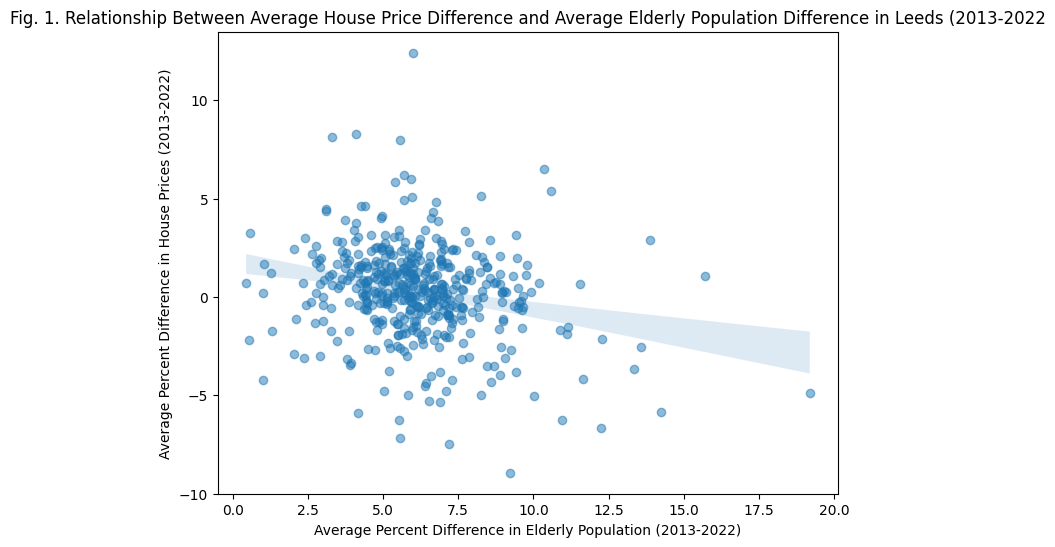

In [84]:
# Plotting relationship between average elderly population difference and average house price difference over a 10 year period (2013-2022)
plt.figure(figsize=(8, 6))

# Scatter_kws argument was used to better represent where a lot of points were clustered with 'alpha' 0.5 to make points slightly transparent(stack overflow, 2015)
sns.regplot(data=final_df, x='av_per_diff_house', y='av_per_diff_age', scatter_kws={'alpha':0.5})
plt.title('Fig. 1. Relationship Between Average House Price Difference and Average Elderly Population Difference in Leeds (2013-2022')
plt.xlabel('Average Percent Difference in Elderly Population (2013-2022)')
plt.ylabel('Average Percent Difference in House Prices (2013-2022)')

plt.show()

In [85]:
# Quantifying the strength of the correlation between average percent of elderly difference over 10 years with average percent of house price difference over 10 years
spearman_corr = final_df['av_per_diff_age'].corr(final_df['av_per_diff_house'], method='spearman')
print(spearman_corr)

-0.20982750696271593


##Choices made in the scatterplot

Spearmans rank correlation statistical method was used to output the correlation coefficient between the average percent difference in age and the average percent difference in house prices because it deals with non-normalised data and outliers better (Schober et al., 2018). Results seem to be clustered, therefore the use of transparent points was employed to give a better representation of the number of points.

# Data visualisation for spatial component

In [86]:
!pip install contextily
!pip install geoplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 42.5 MB/s eta 0:00:00


In [87]:
import geopandas as gpd
import contextily as ctx
import geoplot as gplt
import geoplot.crs as gcrs

In [88]:
# Load in all files (.shp, .dbf, .prj, .shx) for england_lsoa_2021 into jupyter files
# Reading in LSOA shapefile

lsoa = gpd.read_file('england_lsoa_2021.shp')

lsoa.head()

,label,lsoa21cd,lsoa21nm,name,geometry
0,E92000001E12000003E08000036E02002465E01011905,E01011905,Wakefield 028C,Wakefield 028C,"POLYGON ((431757.944 419643.827, 431759.407 41..."
1,E92000001E12000003E08000036E02002444E01011876,E01011876,Wakefield 007B,Wakefield 007B,"POLYGON ((435467.062 424661.606, 435468.954 42..."
2,E92000001E12000003E07000165E02005768E01034963,E01034963,Harrogate 008E,Harrogate 008E,"POLYGON ((425907.594 459285.594, 425930.813 45..."
3,E92000001E12000003E08000036E02002448E01011803,E01011803,Wakefield 011A,Wakefield 011A,"POLYGON ((448734.559 423385.667, 448737.655 42..."
4,E92000001E12000003E08000035E02002359E01011297,E01011297,Leeds 030B,Leeds 030B,"POLYGON ((442339.406 438083.312, 442357.404 43..."


In [89]:
# Removing all data not related to Leeds
leeds = lsoa[lsoa['lsoa21nm'].str.contains('Leeds', case=False)]

leeds.head()

,label,lsoa21cd,lsoa21nm,name,geometry
4,E92000001E12000003E08000035E02002359E01011297,E01011297,Leeds 030B,Leeds 030B,"POLYGON ((442339.406 438083.312, 442357.404 43..."
14,E92000001E12000003E08000035E02002394E01011347,E01011347,Leeds 065B,Leeds 065B,"POLYGON ((432307.000 434539.000, 432317.282 43..."
15,E92000001E12000003E08000035E02002394E01011348,E01011348,Leeds 065C,Leeds 065C,"POLYGON ((432690.656 434287.398, 432691.000 43..."
24,E92000001E12000003E08000035E02006876E01011468,E01011468,Leeds 112B,Leeds 112B,"POLYGON ((432148.969 431481.872, 432211.688 43..."
26,E92000001E12000003E08000035E02002364E01011656,E01011656,Leeds 035A,Leeds 035A,"POLYGON ((434972.901 437479.947, 434958.000 43..."


In [90]:
# Looking at number of columns and rows for final_df
final_df.shape

(463, 6)

In [91]:
# Looking at number of columns and rows for leeds
leeds.shape

(488, 5)

In [92]:
# Looking at number of columns and rows for age_df
age_df.shape

(482, 22)

In [93]:
# Getting print out of headings for columns in age_df
age_df.head()

,LSOA code,LSOA name,2013_perc_old,2014_perc_old,2015_perc_old,2016_perc_old,2017_perc_old,2018_perc_old,2019_perc_old,2020_perc_old,...,2013-2014_perc_diff,2014-2015_perc_diff,2015-2016_perc_diff,2016-2017_perc_diff,2017-2018_perc_diff,2018-2019_perc_diff,2019-2020_perc_diff,2020-2021_perc_diff,2021-2022_perc_diff,av_per_diff_age
0,E01011698,Leeds 001A,23.440713,24.163320,23.784144,24.881033,25.155494,24.521858,25.589459,25.728155,...,3.082701,-1.569222,4.611852,1.103093,-2.518878,4.353672,0.542005,-3.165488,4.314757,0.852421
1,E01011699,Leeds 001B,25.890208,27.811550,28.352490,29.307692,28.593156,29.192547,29.891304,29.520866,...,7.421116,1.945020,3.369023,-2.438051,2.096273,2.393617,-1.239286,7.734922,2.410671,1.808021
2,E01011701,Leeds 001C,22.756410,24.071082,24.819277,25.655738,26.416667,26.517041,27.870150,28.650794,...,5.777151,3.108272,3.370205,2.965921,0.379965,5.102793,2.801001,-6.495896,0.287784,1.280005
3,E01011702,Leeds 001D,27.937551,28.513732,27.642276,28.919578,29.802956,28.759690,27.953890,27.462888,...,2.062387,-3.056266,4.620825,3.054602,-3.500545,-2.801836,-1.756473,-8.420334,0.990932,-1.207677
4,E01011703,Leeds 001E,35.355987,36.850649,38.158930,38.988581,40.728477,41.891892,42.653233,43.881857,...,4.227466,3.550224,2.174198,4.462579,2.856515,1.817394,2.880494,5.883888,1.343778,2.774341


In [94]:
# Joining age_df to leeds dataframe as it has more complete columns as final_df removed 19 null values previously because of no values for price data

leeds_merge  = pd.merge(leeds, age_df,  left_on='lsoa21cd', right_on='LSOA code', how='left')

leeds_merge.head()

,label,lsoa21cd,lsoa21nm,name,geometry,LSOA code,LSOA name,2013_perc_old,2014_perc_old,2015_perc_old,...,2013-2014_perc_diff,2014-2015_perc_diff,2015-2016_perc_diff,2016-2017_perc_diff,2017-2018_perc_diff,2018-2019_perc_diff,2019-2020_perc_diff,2020-2021_perc_diff,2021-2022_perc_diff,av_per_diff_age
0,E92000001E12000003E08000035E02002359E01011297,E01011297,Leeds 030B,Leeds 030B,"POLYGON ((442339.406 438083.312, 442357.404 43...",E01011297,Leeds 030B,16.180203,16.356639,16.781898,...,1.090443,2.599919,-0.378023,12.535955,-0.481638,2.132918,-0.060864,-3.565140,0.308806,1.454659
1,E92000001E12000003E08000035E02002394E01011347,E01011347,Leeds 065B,Leeds 065B,"POLYGON ((432307.000 434539.000, 432317.282 43...",E01011347,Leeds 065B,8.138873,7.662624,6.918574,...,-5.851535,-9.710124,-6.894705,-8.592340,-5.734666,-3.365152,-2.097361,-6.116739,-4.901434,-5.268058
2,E92000001E12000003E08000035E02002394E01011348,E01011348,Leeds 065C,Leeds 065C,"POLYGON ((432690.656 434287.398, 432691.000 43...",E01011348,Leeds 065C,9.479554,9.669670,10.029674,...,2.005535,3.723022,-8.167238,0.334121,-0.382162,2.642754,4.093332,-22.010670,1.257137,-2.056634
3,E92000001E12000003E08000035E02006876E01011468,E01011468,Leeds 112B,Leeds 112B,"POLYGON ((432148.969 431481.872, 432211.688 43...",E01011468,Leeds 112B,14.847716,13.959085,13.620690,...,-5.984963,-2.424197,-3.017625,-1.184338,-3.099408,-0.417521,-3.117182,0.178119,-2.386635,-1.718754
4,E92000001E12000003E08000035E02002364E01011656,E01011656,Leeds 035A,Leeds 035A,"POLYGON ((434972.901 437479.947, 434958.000 43...",E01011656,Leeds 035A,8.462055,8.865010,9.397750,...,4.761905,6.009466,5.733556,-3.755474,-7.037126,-0.638238,-0.208811,7.790301,0.454616,0.927588


In [95]:
# Error messages in later code suggest null values in leeds_merge
leeds_merge.isna().sum()

label                   0
lsoa21cd                0
lsoa21nm                0
name                    0
geometry                0
LSOA code              15
LSOA name              15
2013_perc_old          15
2014_perc_old          15
2015_perc_old          15
2016_perc_old          15
2017_perc_old          15
2018_perc_old          15
2019_perc_old          15
2020_perc_old          15
2021_perc_old          15
2022_perc_old          15
2013-2014_perc_diff    15
2014-2015_perc_diff    15
2015-2016_perc_diff    15
2016-2017_perc_diff    15
2017-2018_perc_diff    15
2018-2019_perc_diff    15
2019-2020_perc_diff    15
2020-2021_perc_diff    15
2021-2022_perc_diff    15
av_per_diff_age        15
dtype: int64

In [96]:
# There are no null values however, warning messages were output when trying to create a map. Suggestions that there may be infinite values

np.isinf(leeds_merge['av_per_diff_age']).sum()

4

In [97]:
# Replacing infinite values with 0
# Chat GPT 3.5 was used in the creation of this code with prompt " how can I convert infinite values for a specific column"

# Replaces any positive or negative infinite values with 'nan' value
leeds_merge['av_per_diff_age'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Replaces 'nan' values with 0
leeds_merge['av_per_diff_age'].fillna(0, inplace=True)

np.isinf(leeds_merge['av_per_diff_age']).sum()

0

In [98]:
# Checking coordinate system of Leeds output areas
print(leeds_merge.crs)

EPSG:27700


In [99]:
# Installing matplotlib scalebar
!pip install matplotlib-scalebar

In [100]:
# Importing scalebar from matplotlib
from matplotlib_scalebar.scalebar import ScaleBar


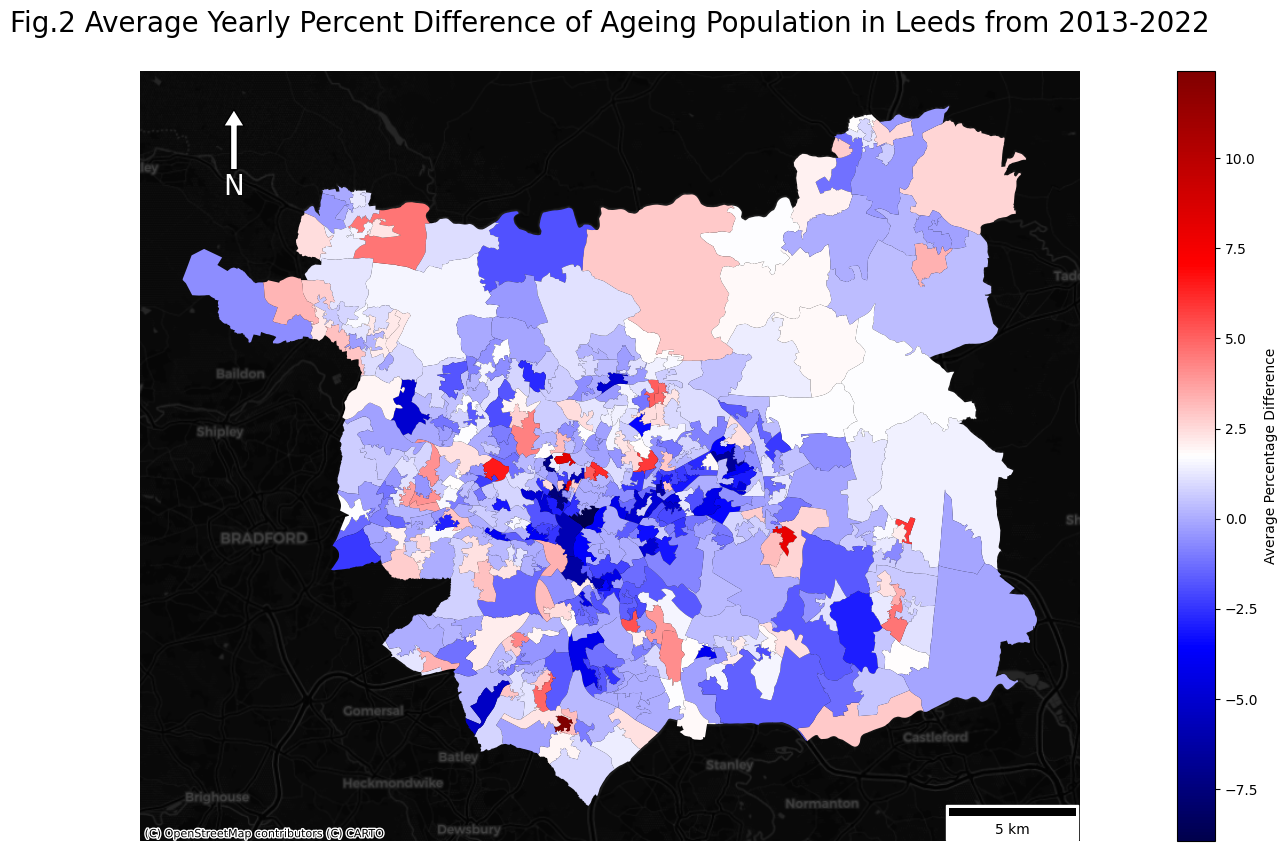

In [101]:

# Plotting map and visualisation options
f,ax = plt.subplots(1, figsize=(25,10))
leeds_merge.plot(column='av_per_diff_age',legend=True,ax=ax, cmap='seismic').set_title('Fig.2 Average Yearly Percent Difference of Ageing Population in Leeds from 2013-2022', fontsize='20', y=1.04)

# Remove axis
ax.set_axis_off()

# Adding basemap with 27700 crs to match the shapefile
ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatter, crs= 'EPSG:27700')

#Chat GPT 3.5 was used in being able to label the colour bar with prompt "how do i label the colour bar on the right side of the map"
cbar = ax.get_figure().get_axes()[1]

# Seting label for the colourbar
cbar.set_ylabel('Average Percentage Difference')

#Chat GPT 3.5 was used in being able to add a scale bar with prompt "how do i add a scale bar to the map"
#setting the units as metres and adding it to the lower right of the map
scalebar = ScaleBar(1, units='m', location='lower right')
ax.add_artist(scalebar)

# Adding North arrow, (modified from stack overflow)
#setting the position
x, y, arrow_length = 0.1, 0.95, 0.1
#annotating with attributes for North arrow
ax.annotate('N',color='white', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='white', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

plt.show();

##Choices made in the map

The colour palette was set to ‘seismic’ because it is a divergent colour palette and the top end of the scale is worse when taking into account the correlation graph in Figure 1. This is why the colour red is used for large percent differences and blue is used for negative values as red is usually seen to indicate ‘bad’ areas. The base map was used because it offered the least obstruction to the data whilst still providing general area context.

The ‘age_df’ was used to merge with the ‘Leeds’ shapefile because the ‘final_df’ had 19 fewer areas because of the house price data and removing null values. There are still 6 areas missing from the LSOA in Leeds as seen in Figure 2 because the shapefile uses 2021 boundaries and codes, therefore the age_df LSOA codes may not be from 2021 so some data does not exist.


#Results and Discussion




The scatter plot in Figure 1 shows how the average percent difference of over 65’s relates to the average percent price difference over the years 2013-2022. The results show that an ageing population has a weak to moderate negative correlation (Schober et al., 2018), for house prices over this period for the LSOAs of Leeds. This finding means that potentially an increased ageing population in an LSOA in Leeds leads to a decrease in house pricing, this is concurrent with the research (Saita et al., 2016, Takáts, 2012). The correlation isn’t strong however, so this suggests there are multiple other factors at play that dictate house price fluctuations in a given area.

The Map in Figure 2 shows the distribution of the highest and lowest averages of percentage difference in ageing populations from 2013-2022. High percentage numbers indicate a faster growing ageing population and those with negative percentage numbers mean that the area has a declining ageing population. Figure 2 seems to show generally a declining ageing population towards the centre of Leeds although some outliers are present.

This correlation suggests to businesses and the wider general public that purchasing a property inside an area with a growing ageing population means that the value of the property may decline over time rather than appreciate. Generally, people want their assets to appreciate in value so the map suggests places that are potentially unwise to invest in property if there is a high ageing population, the same is true of the reverse.

# Conclusion



To conclude, the relationship between property prices and an ageing population has been explored for the LSOAs in Leeds. The data can be used to inform choices of property purchasing with the intended audience for this data being the general public and businesses. Limitations of this data have been documented with further improvements suggested.

# Data and References




##Data

Ageing:
ONS. 2024. Lower layer Super Output Area population estimates (supporting information) - Office for National Statistics. [Online]. [Accessed 9 May 2024]. Available from: https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/lowersuperoutputareamidyearpopulationestimates.

House Prices:
ONS. 2024. House price data: annual tables - Office for National Statistics. [Online]. [Accessed 9 May 2024]. Available from: https://www.ons.gov.uk/economy/inflationandpriceindices/datasets/housepriceindexannualtables2039.

LSOA Shapefile:
UK Data Service 2022. 2011 census geography boundaries (Lower Layer Super Output Areas and data zones). UK Data Service. [Online]. [Accessed 9 May 2024]. Available from: https://statistics.ukdataservice.ac.uk/dataset/2011-census-geography-boundaries-lower-layer-super-output-areas-and-data-zones.

##References

Chat GPT 3.5 n.d. Chat GPT 3.5. [Online]. [Accessed 9 May 2024]. Available from: https://openai.com/.

Guest, R. and Swift, R. 2010. Population ageing and house prices in Australia. Australian Economic Review. 43(3), pp.240–253.

Healy, J. 2004. The benefits of an ageing population [Online]. Canberra: Australia Institute. [Accessed 13 May 2024]. Available from: https://library.bsl.org.au/jspui/bitstream/1/576/1/The%20benefits%20of%20an%20ageing%20population,%20Healy%20Judith.pdf.

Harper, S. and Leeson, G. 2008. Introducing the Journal of Population Ageing. Journal of Population Ageing. 1(1), pp.1–5.

Ratcliffe, J., Lester, L.H., Couzner, L. and Crotty, M. 2012. An assessment of the relationship between informal caring and quality of life in older community-dwelling adults - more positives than negatives? Health &amp; Social Care in the Community. 21(1) ,pp.35–46.

Saita, Y., Shimizu, C. and Watanabe, T. 2016. Aging and real estate prices: Evidence from Japanese and US Regional Data. International Journal of Housing Markets and Analysis. 9(1), pp.66–87.

Schober, P., Boer, C. and Schwarte, L.A. 2018. Correlation coefficients: Appropriate use and interpretation. Anesthesia & Analgesia. 126(5), pp.1763–1768.

Stack Overflow. n.d. Where developers learn, share, & build careers. Stack Overflow. [Online]. [Accessed 10 May 2024]. Available from: https://stackoverflow.com/.

Takáts, E. 2012. Aging and house prices. Journal of Housing Economics. 21(2), pp.131–141.

WHO. 2022. Ageing and health. World Health Organization. [Online]. [Accessed 16 May 2024]. Available from: https://www.who.int/news-room/fact-sheets/detail/ageing-and-health.